In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# The Scanner

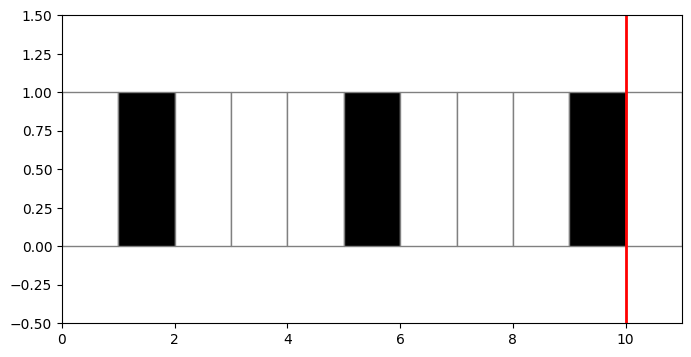

In [3]:
barcode = [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1] # Barcode data (1-> white and 0-> black)

# Initialize the figure
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0, len(barcode))
ax.set_ylim(-0.5, 1.5)

laser, = ax.plot([], [], color='red', linewidth = 2)
                 
# Draw the barcode
for i in range(len(barcode)):
    if barcode[i] == 1:
        color = 'white'
    else:
        color = 'black'
    width = 1
    height = 1
    ax.add_patch(plt.Rectangle((i, 0), width, height, color = color, ec= 'gray'))

# Initialize the laser
def initialize():
    laser.set_data([], [])
    return laser,

# Update the function for the animation
def update(frame):
    x = [frame % len(barcode), frame % len(barcode)]  #the modulus prevents the laser from exceeding the plot and repeats instead
    y = [-0.5, 1.5]
    laser.set_data(x, y)
    return laser,

animation = FuncAnimation(fig, update, frames=np.arange(0, len(barcode) * 50), init_func=initialize, interval=50, blit=True)
HTML(animation.to_jshtml())
animation.save('sine_wave.gif', writer='pillow', fps=30)

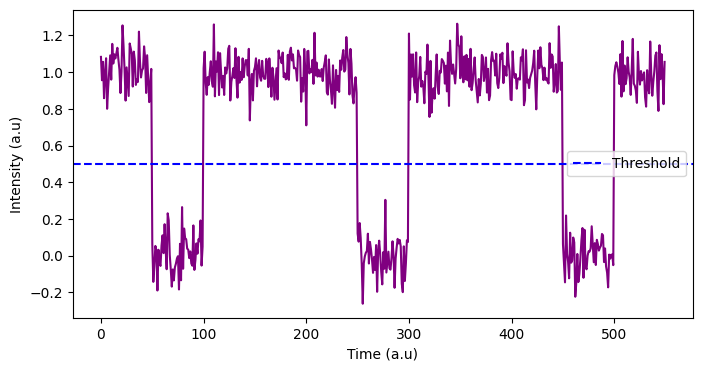

In [6]:
# The scan signal
signal = []
for val in barcode:
    signal.extend([val] * 50)  # 50 points per stripe for smoothness

# Adding noise to make it realistic
signal = np.array(signal) + 0.1 * np.random.randn(len(signal))

# Initialize the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Create the signal plot for the reflected light intensity
ax.plot(signal, c = 'purple')
ax.axhline(0.5, color='blue', linestyle='--', label='Threshold')
ax.legend()
ax.set_xlabel("Time (a.u)")
ax.set_ylabel("Intensity (a.u)")
plt.savefig('intensity.png')
plt.show()

# Eigen frequencies

C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_5284\1244742946.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


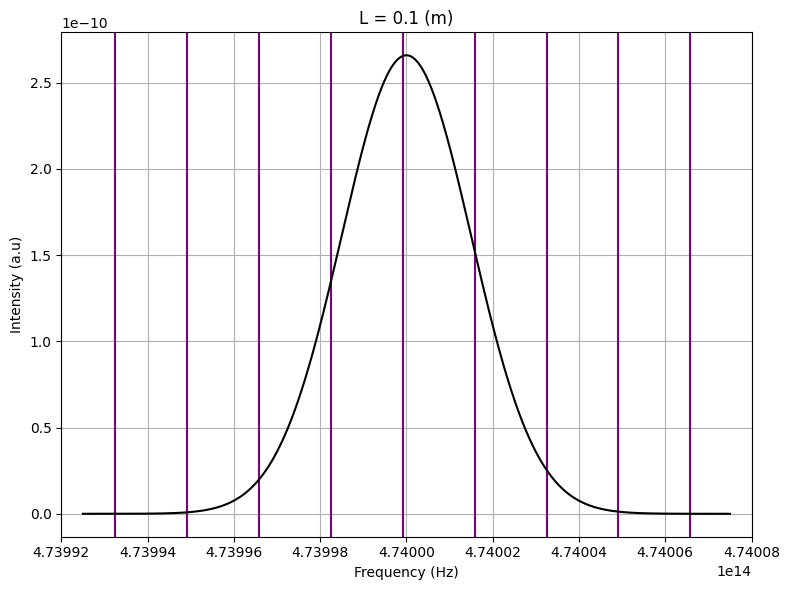

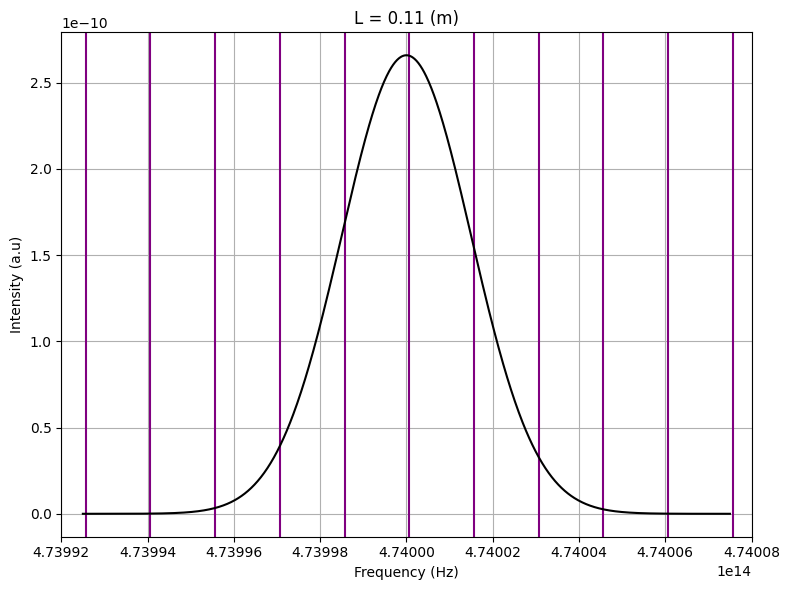

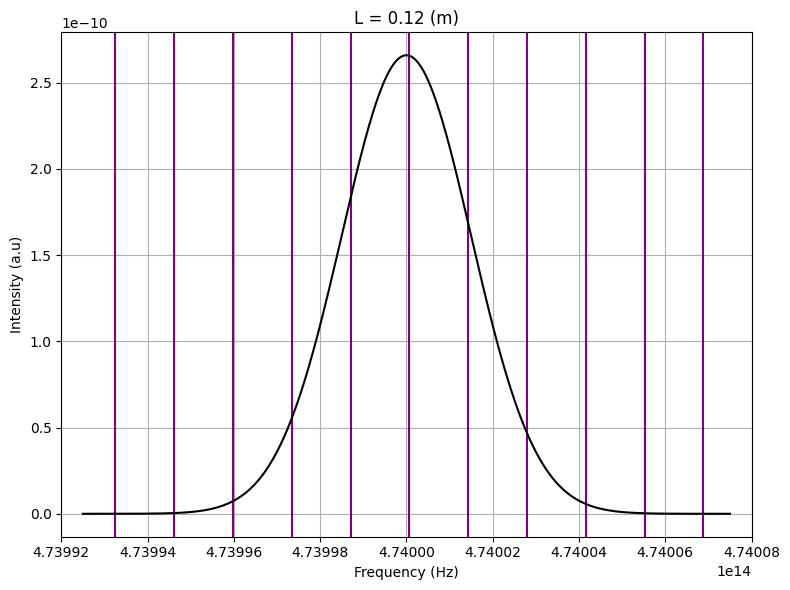

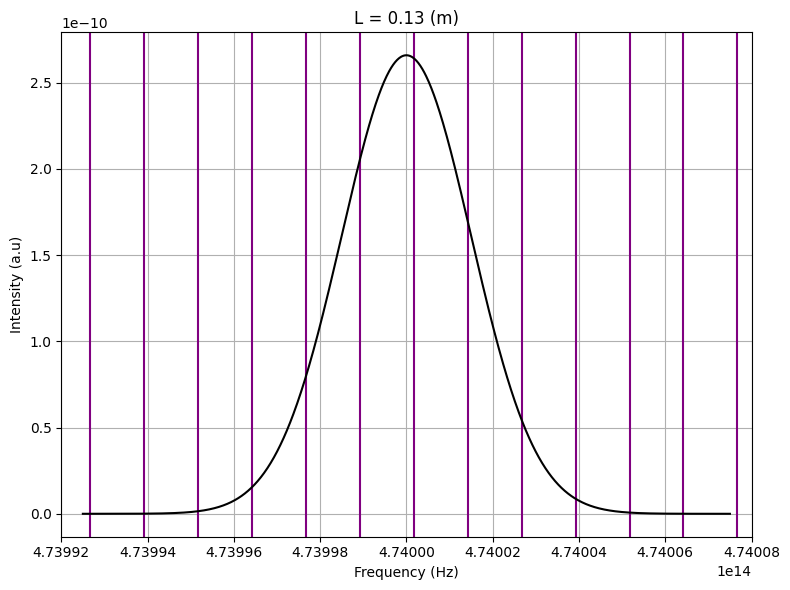

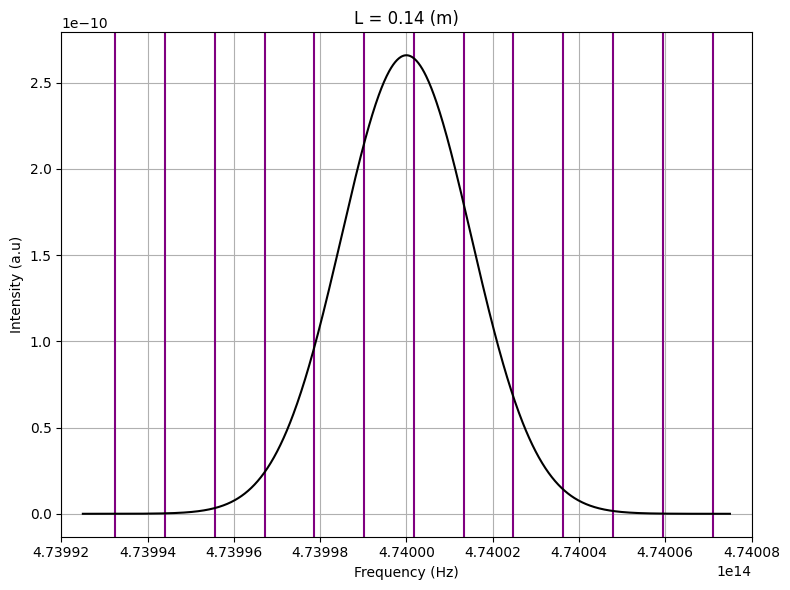

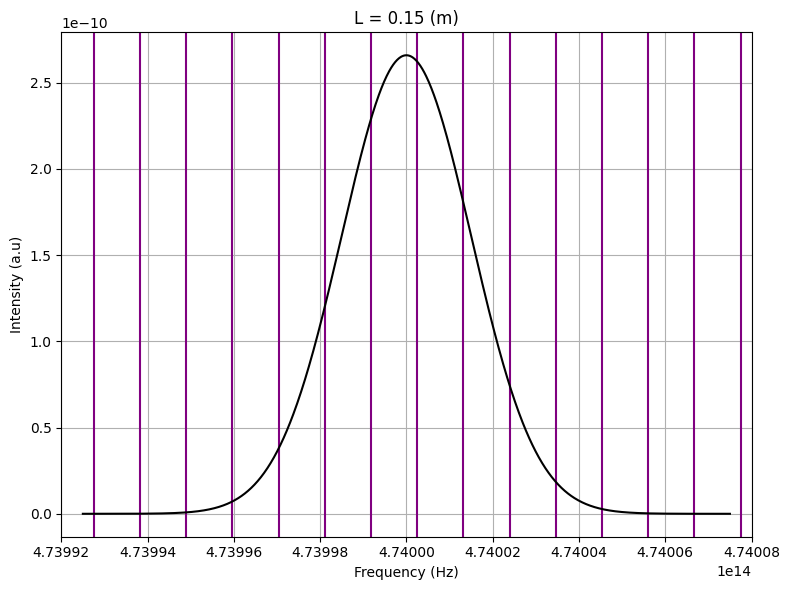

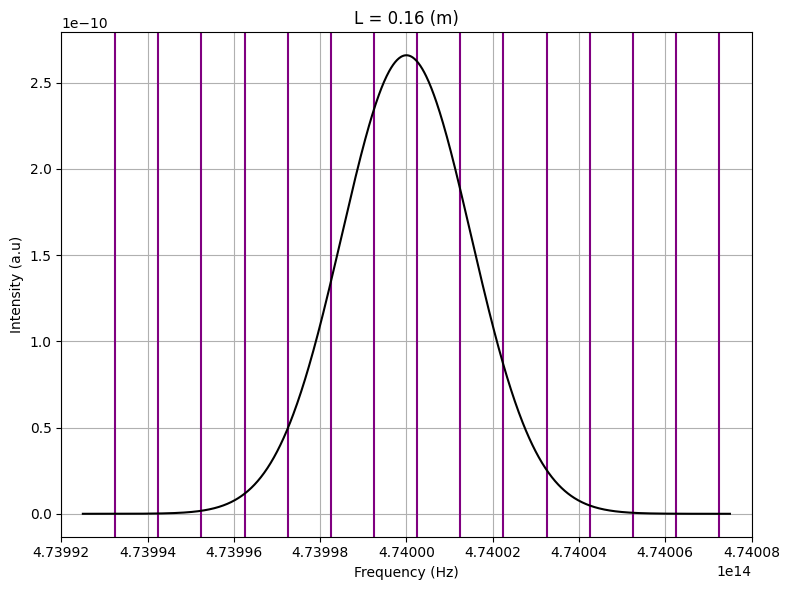

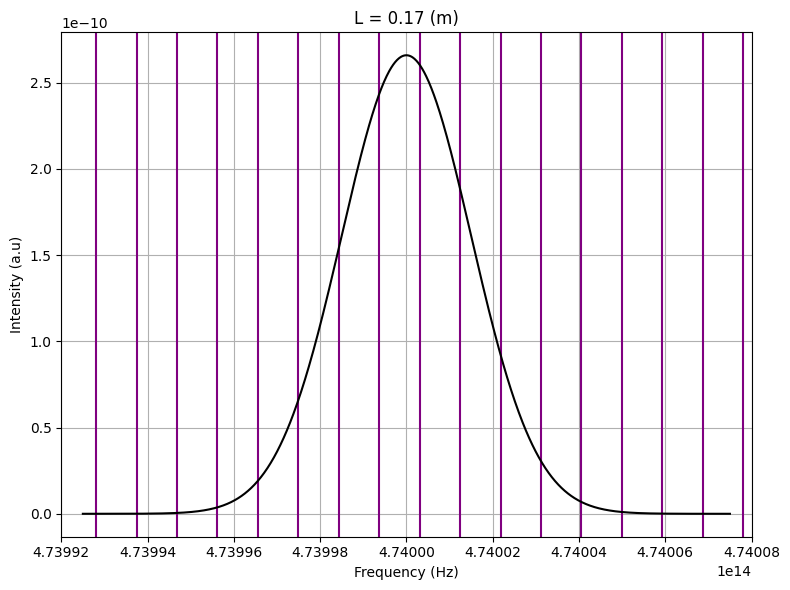

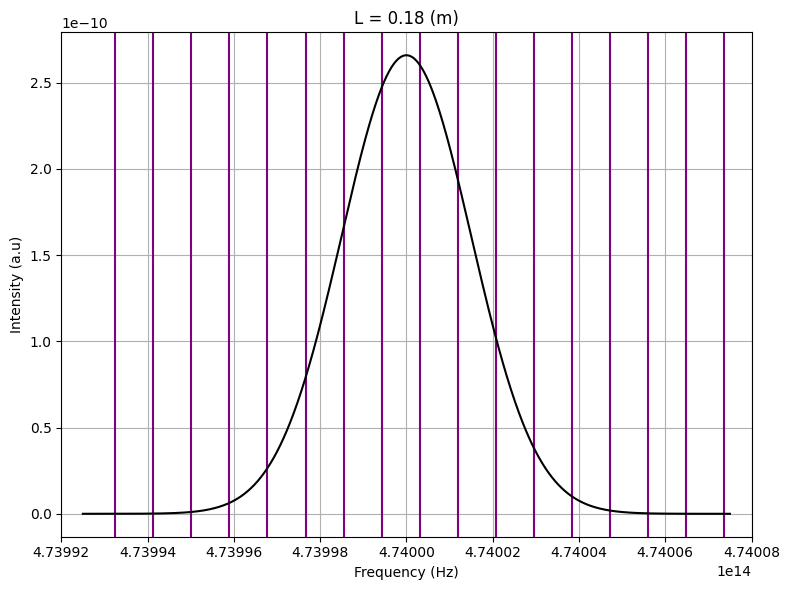

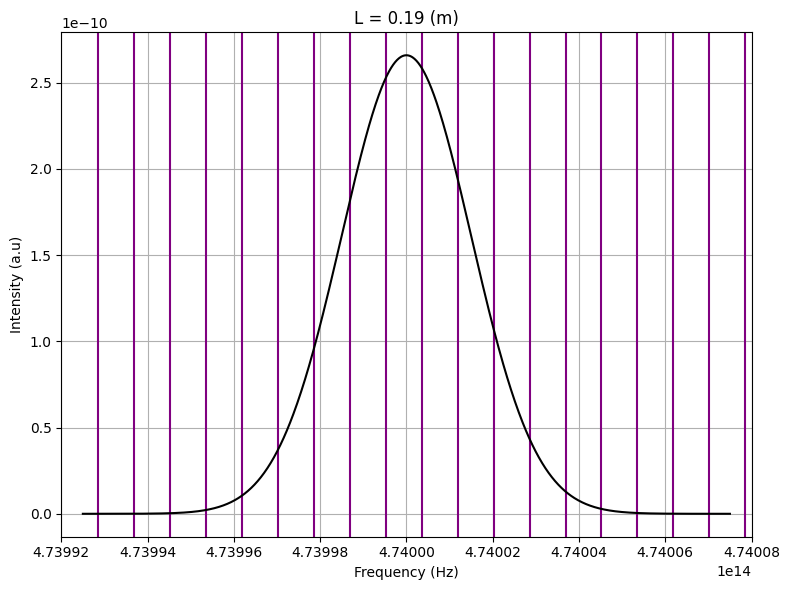

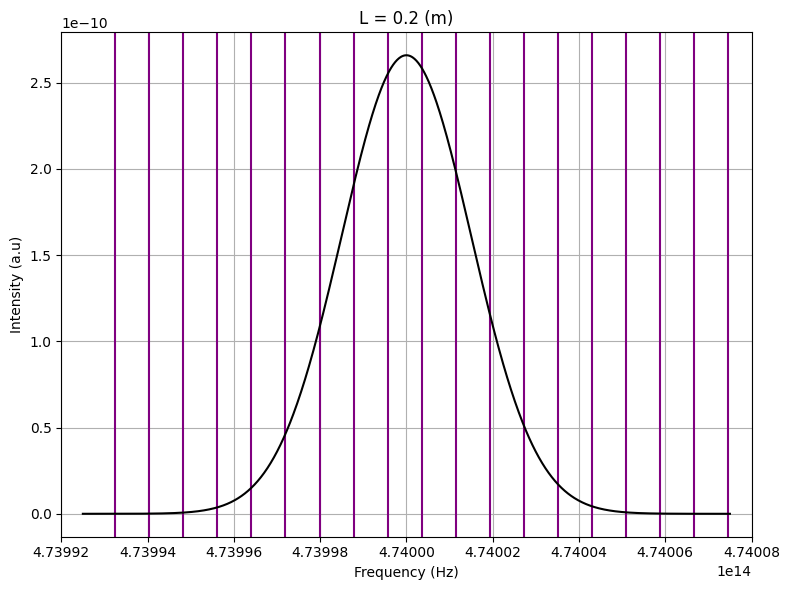

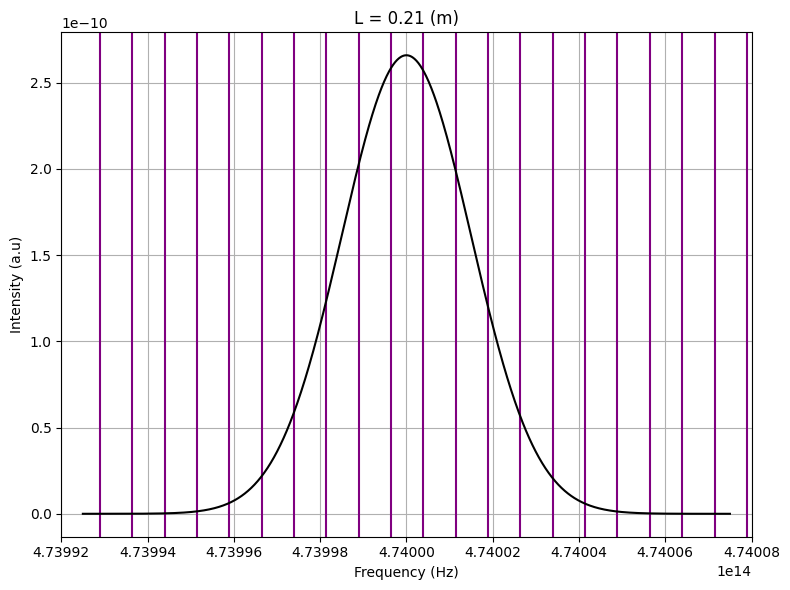

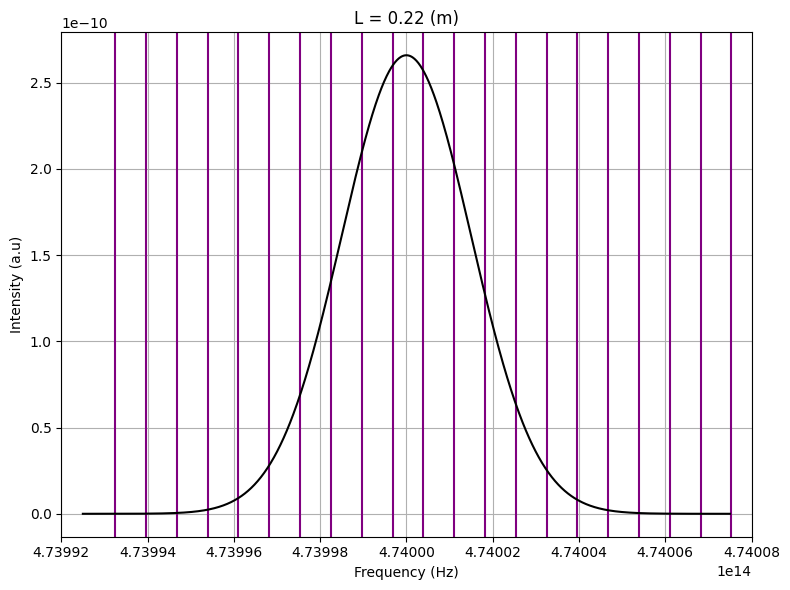

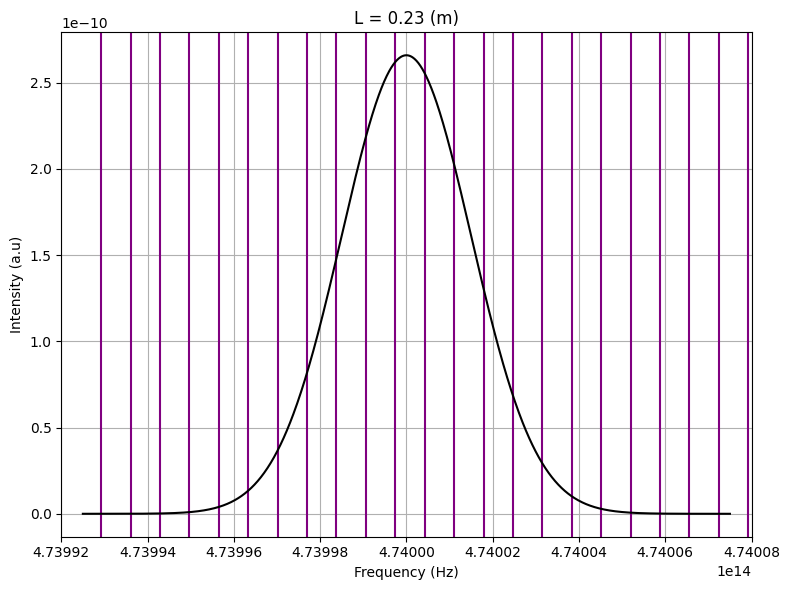

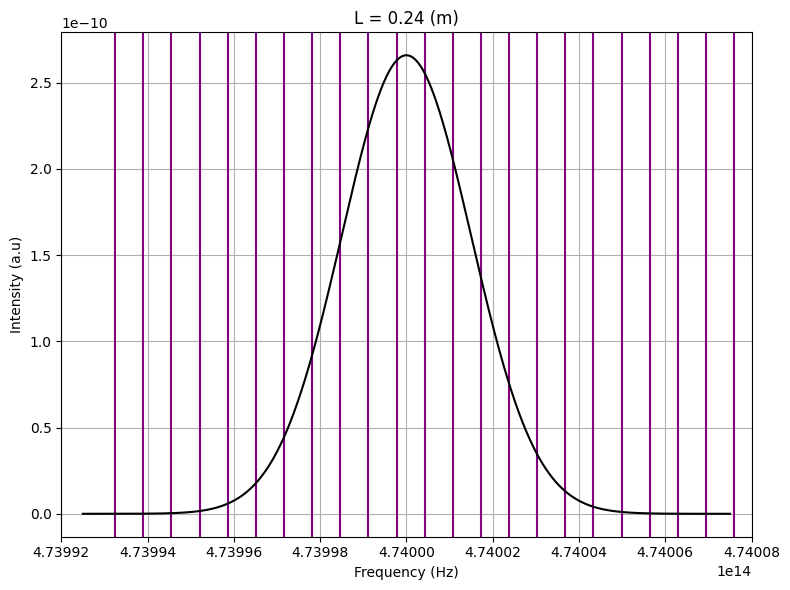

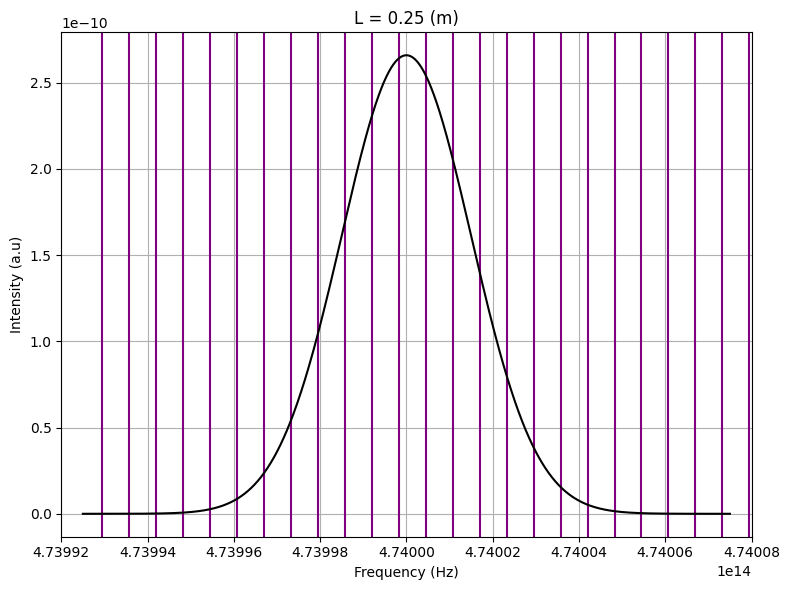

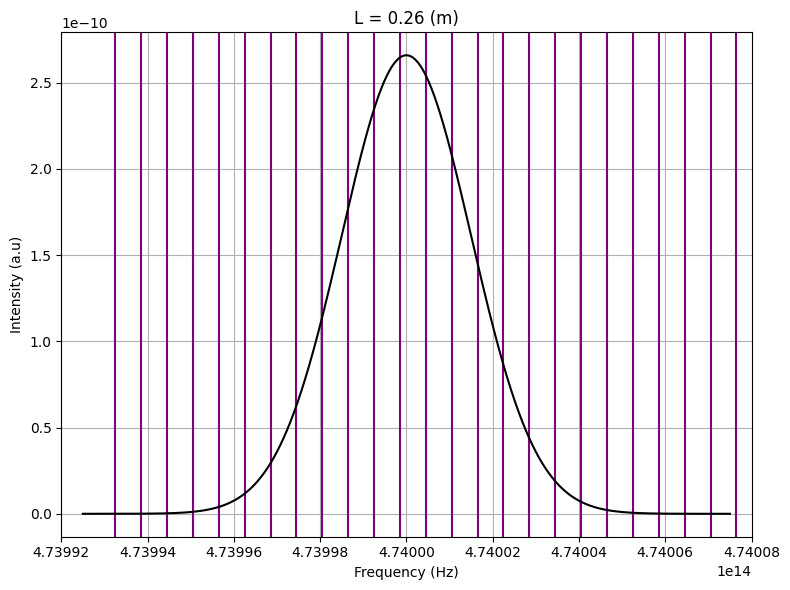

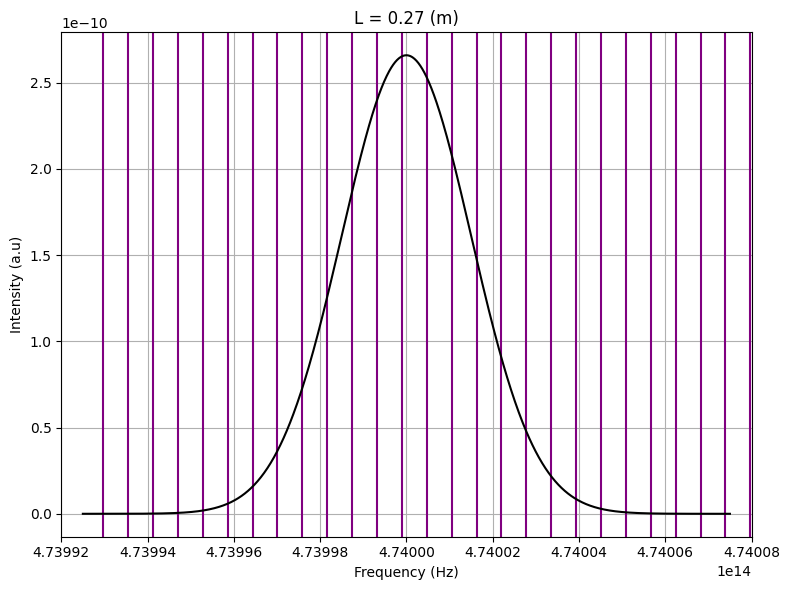

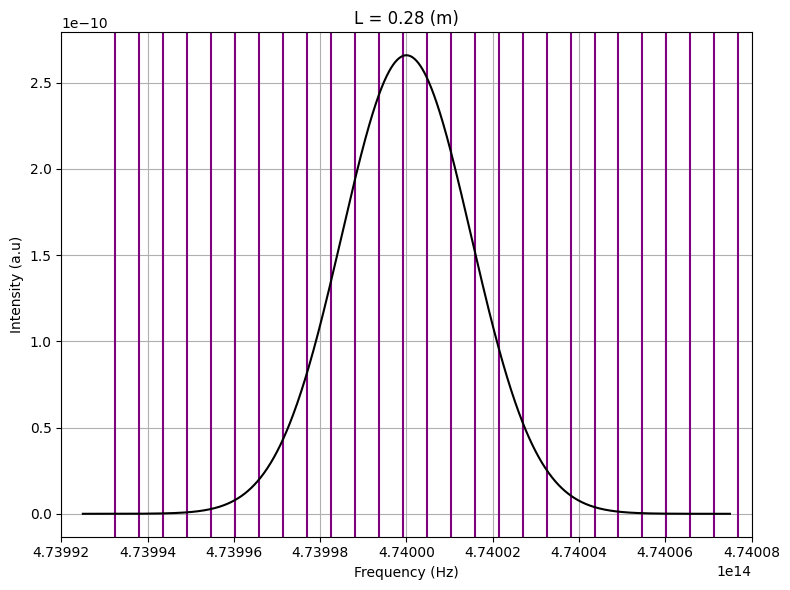

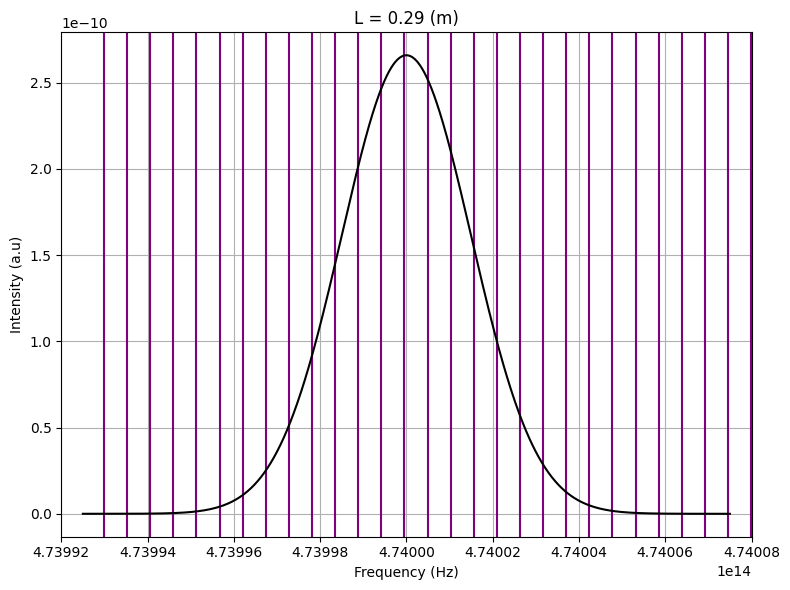

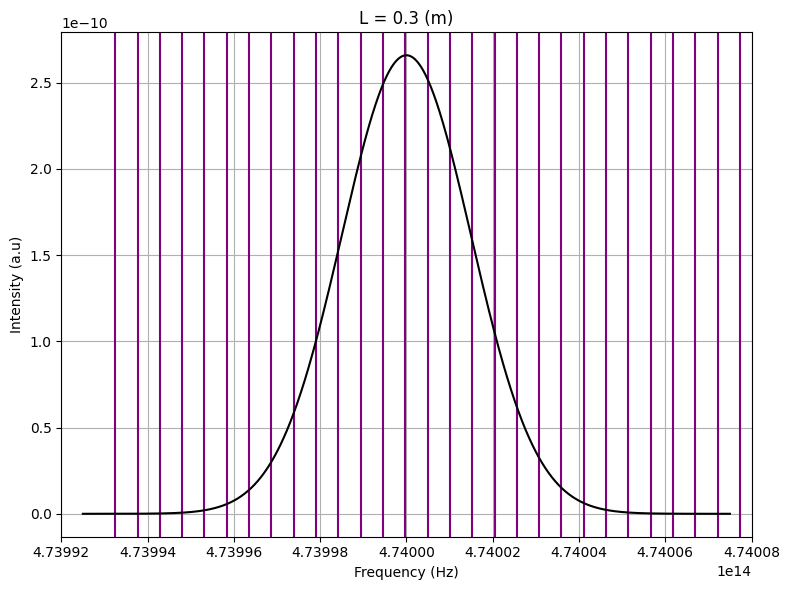

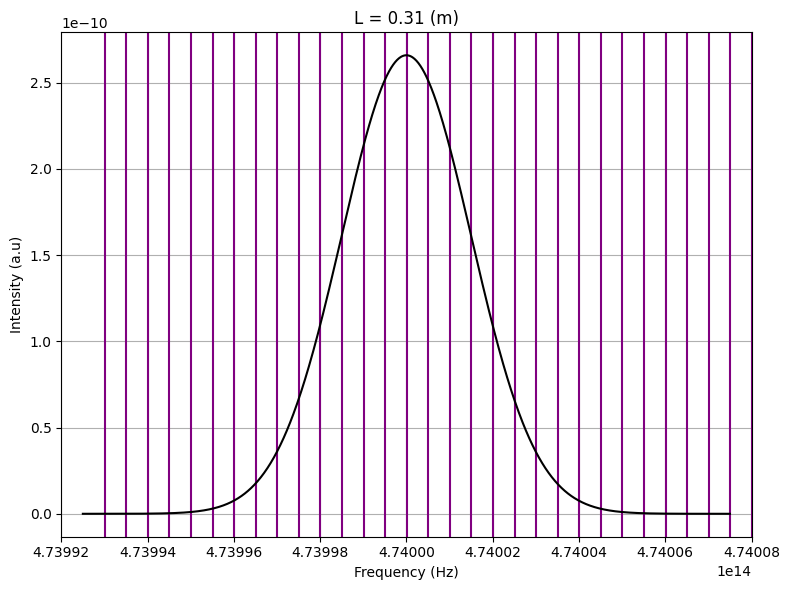

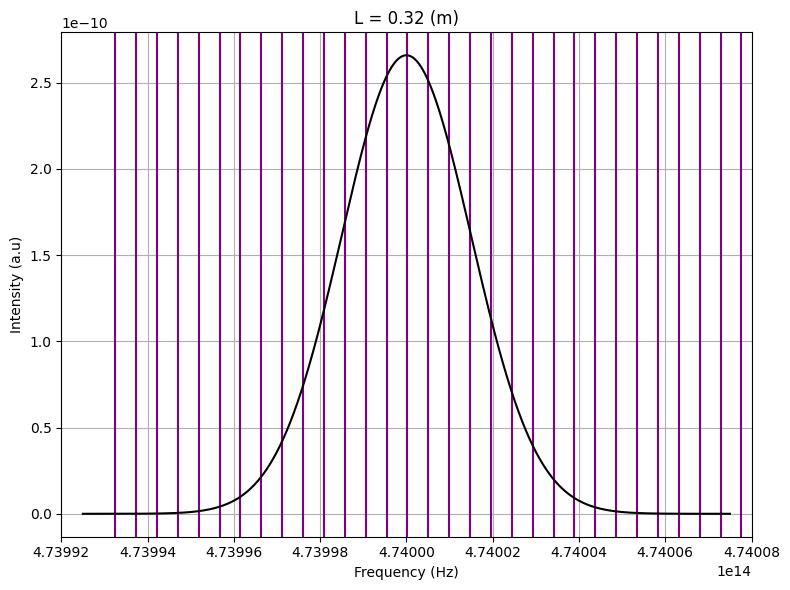

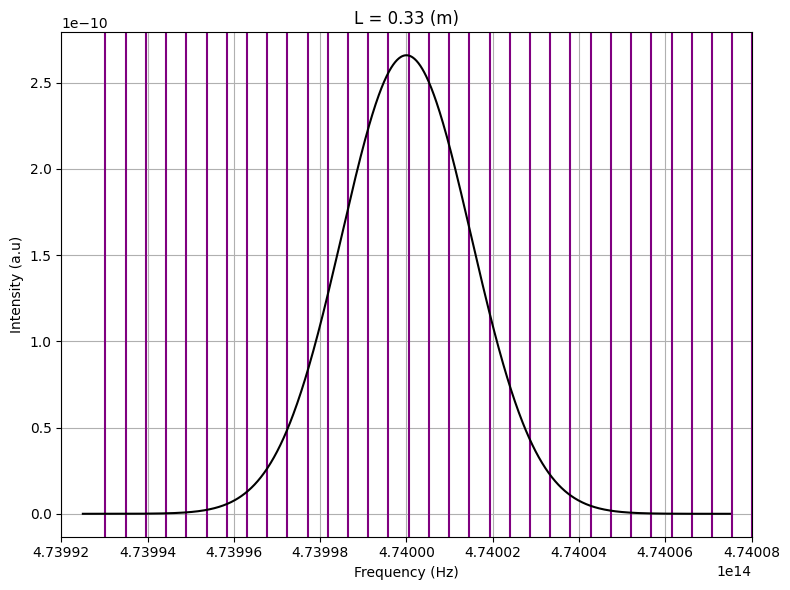

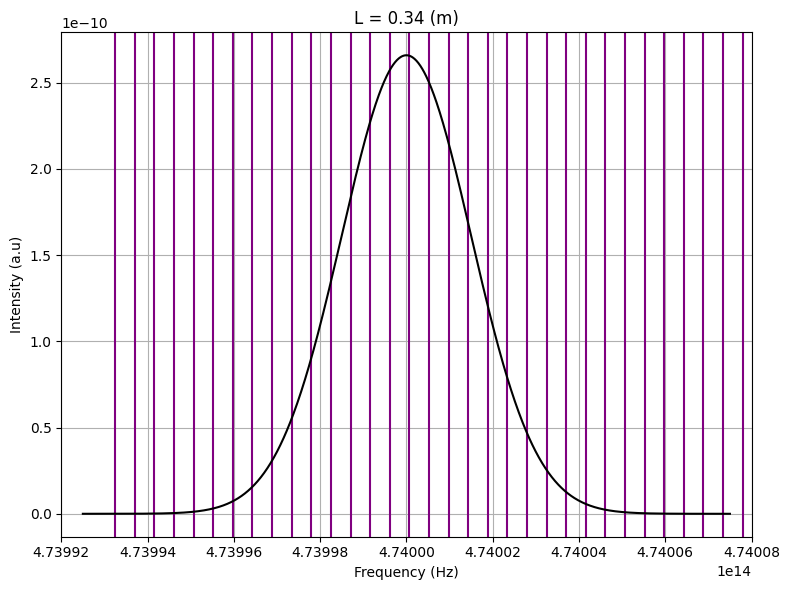

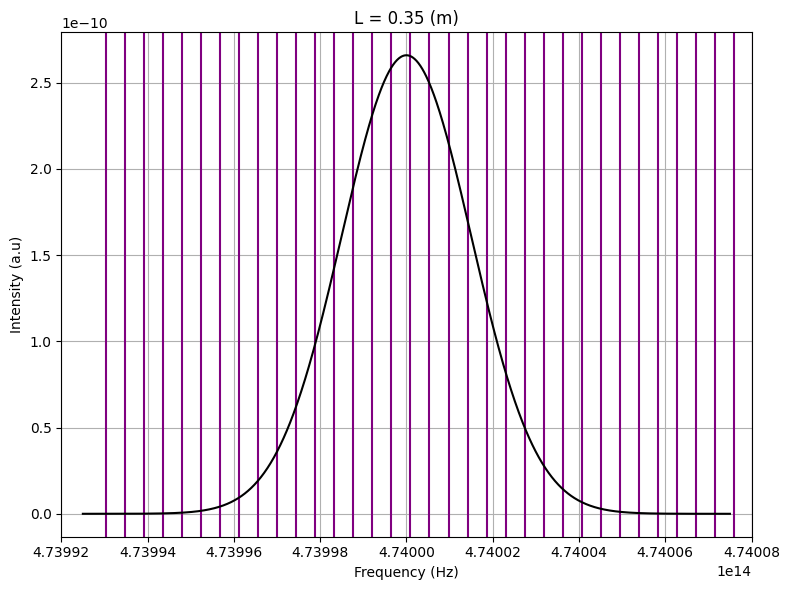

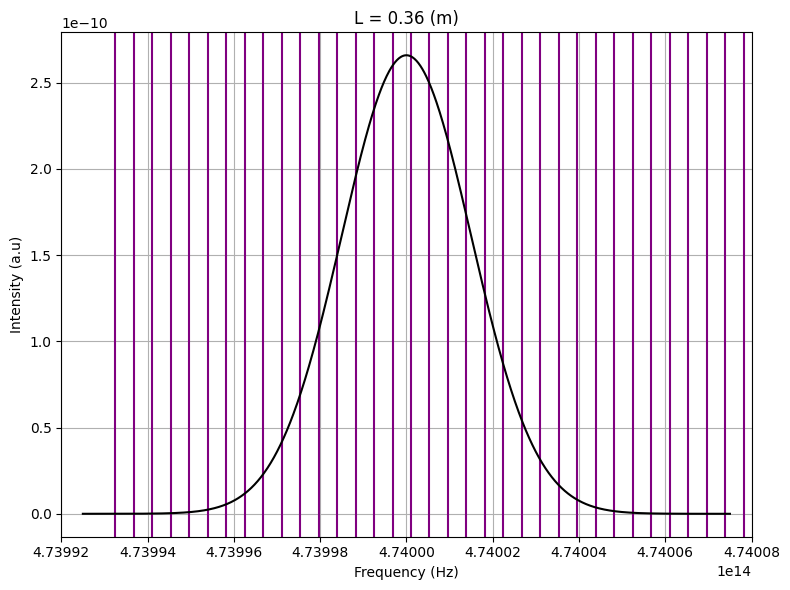

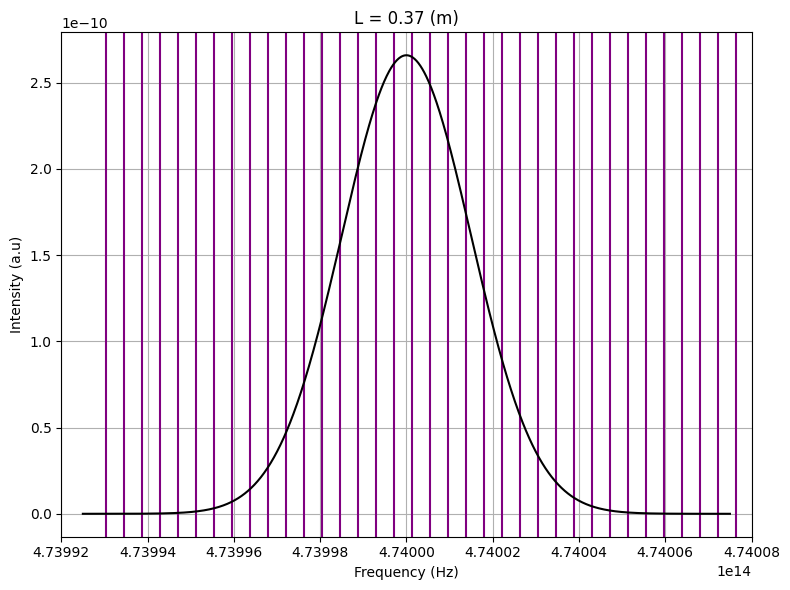

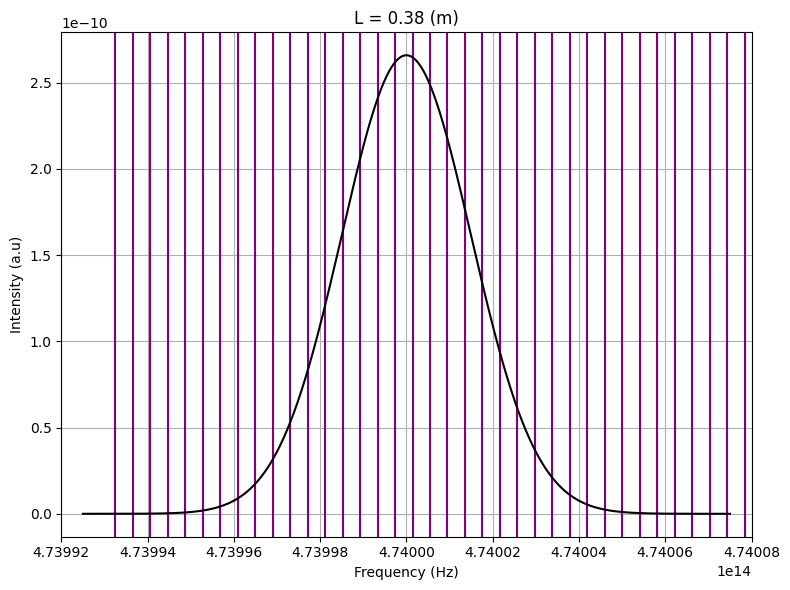

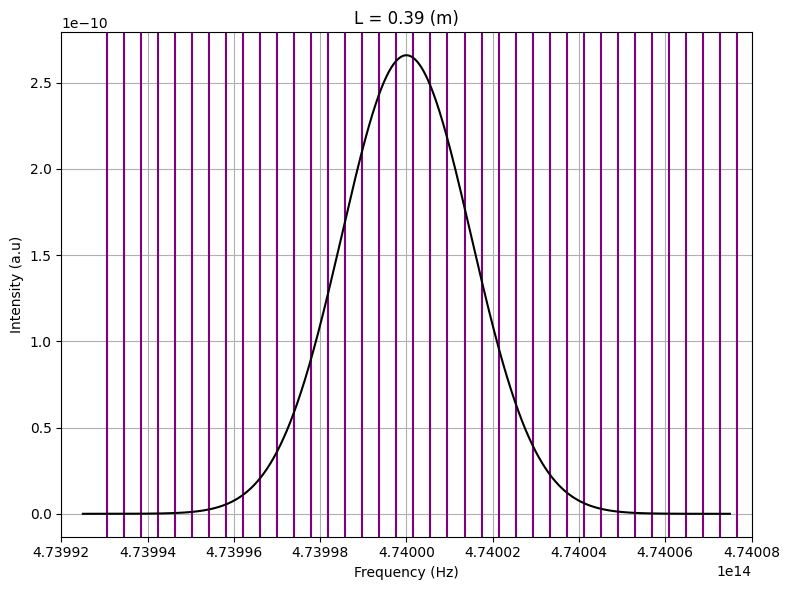

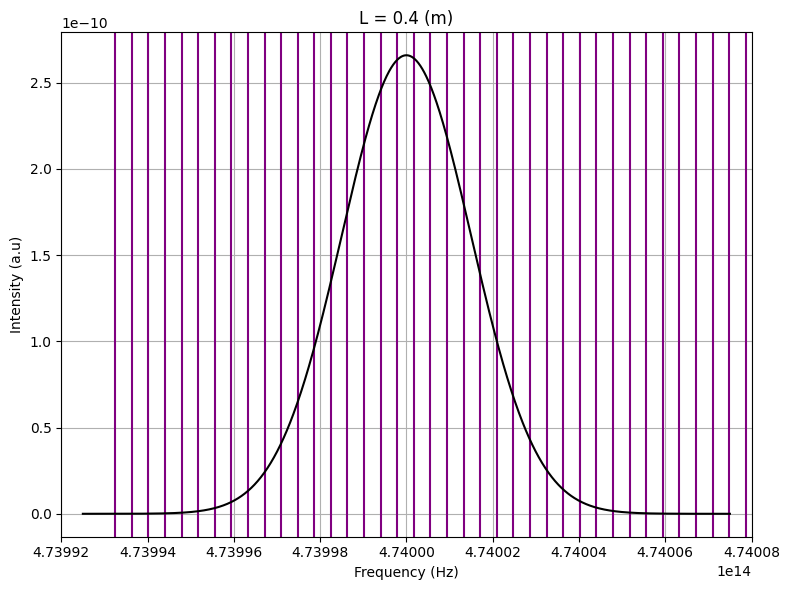

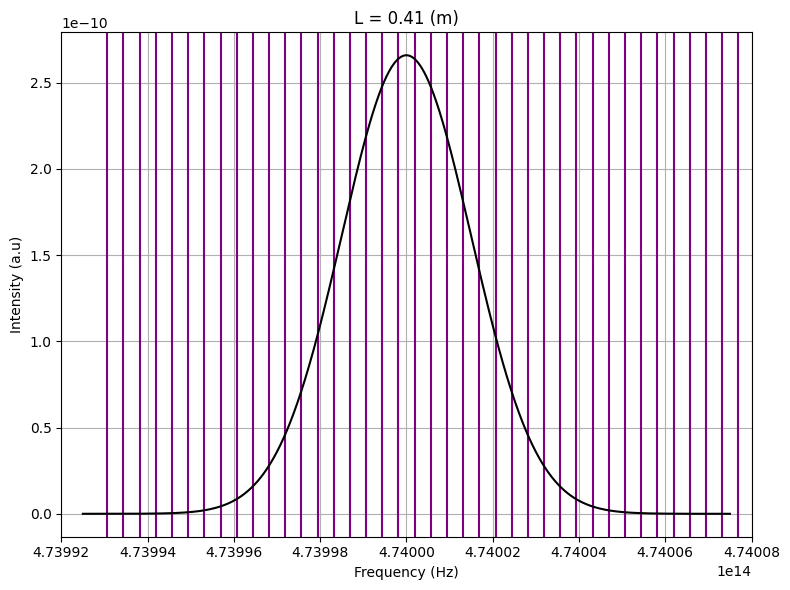

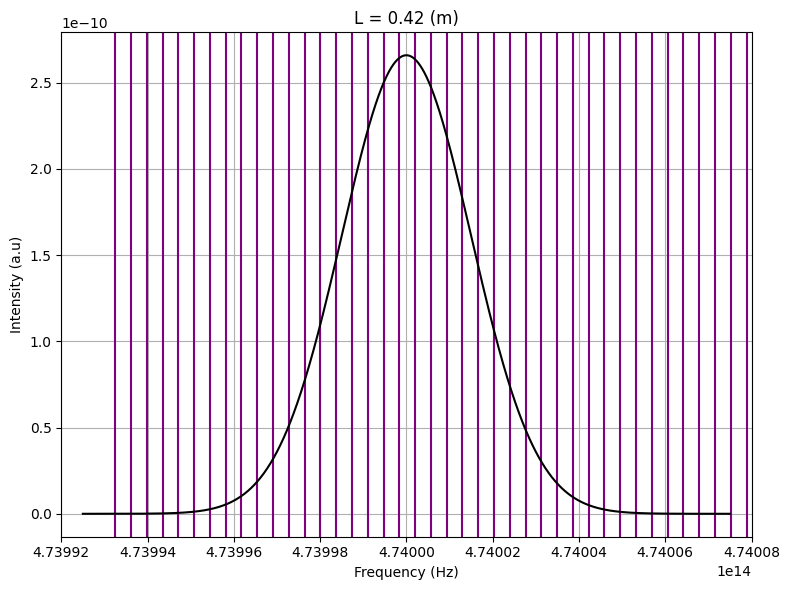

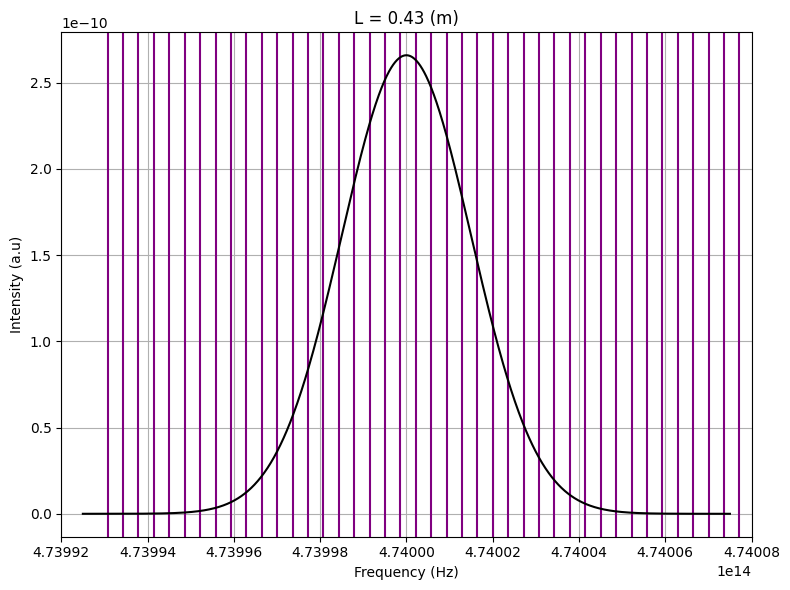

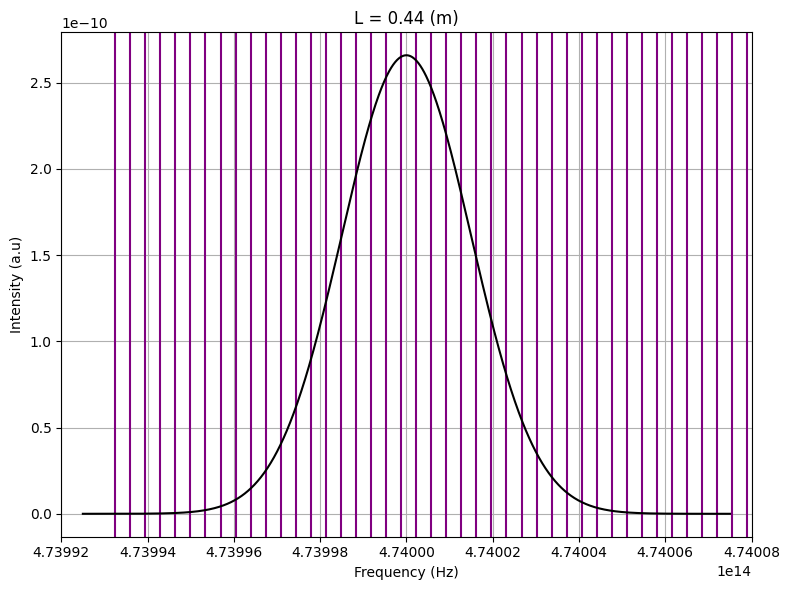

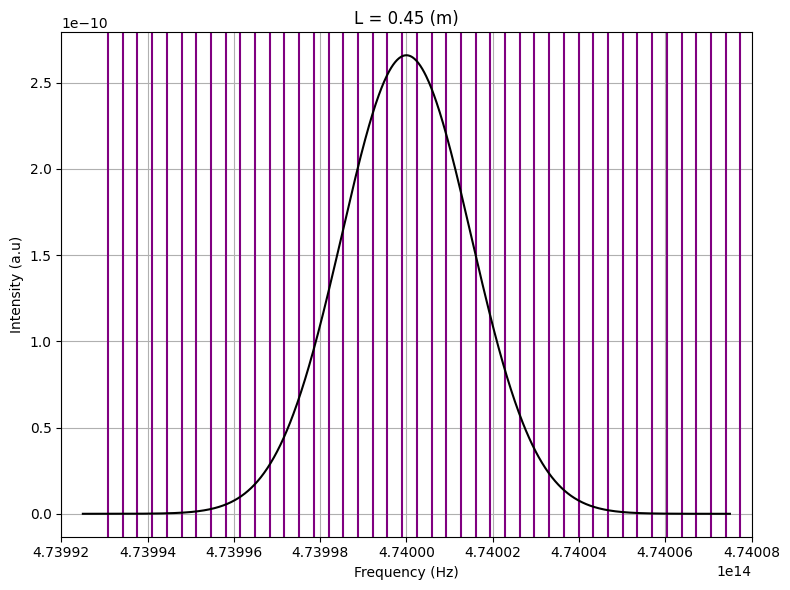

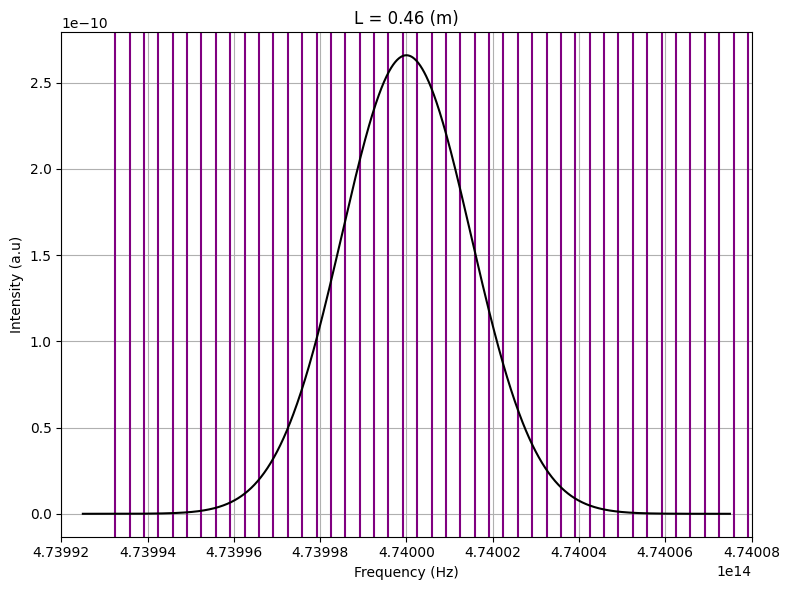

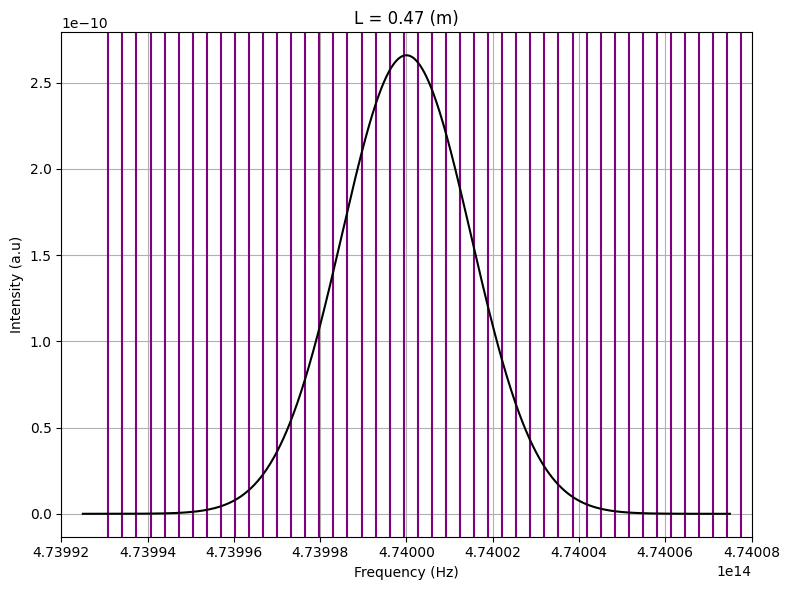

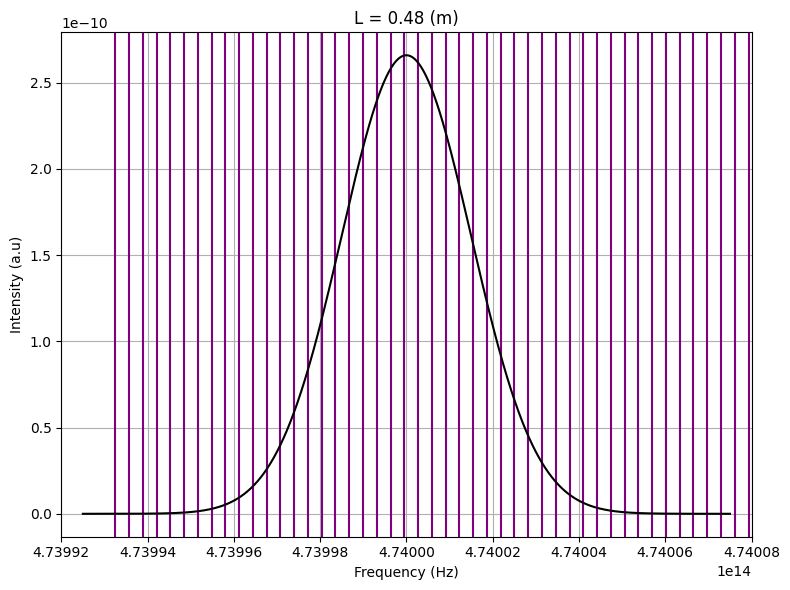

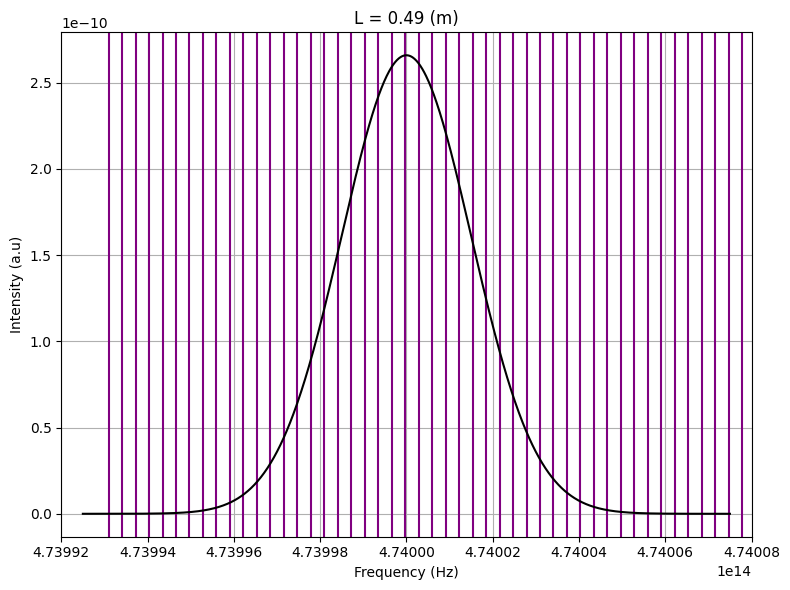

In [23]:
# Constants
l = 0.1
n = 1
c = 3 * 10**8
sigma = 1.5 * 10**9
mu = 4.74 * 10**14 
count = 0 
fsr = c/(2*l)

while l <= 0.5:
    count = count +1
    
    # Eigenfrequencies
    max = np.floor(((mu - 5*sigma)*2*l)/c)
    min = np.floor(((mu + 5 * sigma)*2*l)/c)
    diff = np.abs(int(max - min))
    m = np.linspace(max, min, diff)  # Mode indices
    nu = (c * m) / (2 * l * n) + fsr/2# Eigenfrequencies
    
    # Gaussian (Lineshape function)
    x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)
    f = (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2)) # Gaussian
    #f = (1/np.pi)*((sigma/2)/((x - mu)**2 + (sigma/2)**2)) # Lorentzian
    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Plot eigenfrequency lines
    for i in range(len(nu)):
        plt.axvline(x=nu[i], color='purple', linestyle='-')
    
    # Plot Gaussian
    plt.plot(x, f, color='black')
    plt.title(f'L = {l:0.2} (m)')
    plt.xlim(4.73992e14,4.74008e14)
    # Formatting
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Intensity (a.u)")
    
    plt.ticklabel_format(useOffset=False)  # Show absolute x-axis values
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'eigenfreq/img{count}.png')
    l = l + 0.01
plt.show()

# Gain and Saturation

C:\Users\Amal Marzooq\AppData\Local\Temp\ipykernel_5284\2727177028.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


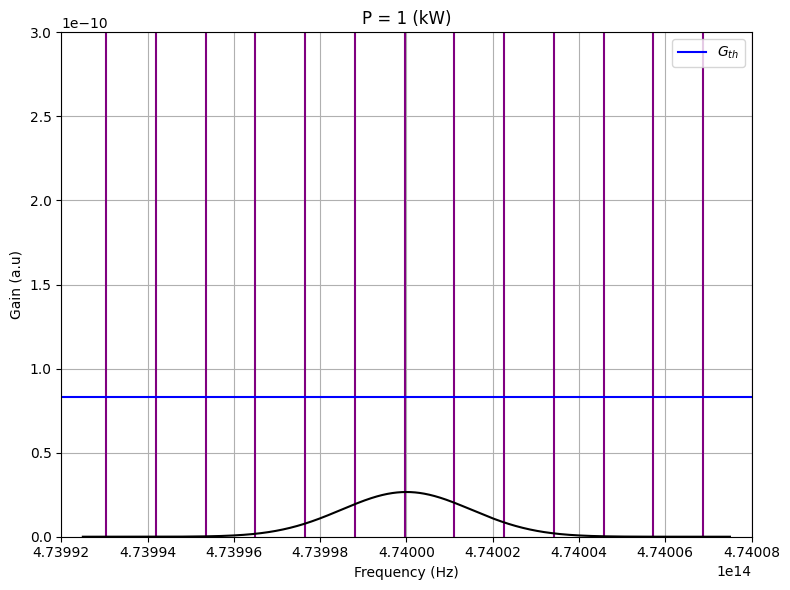

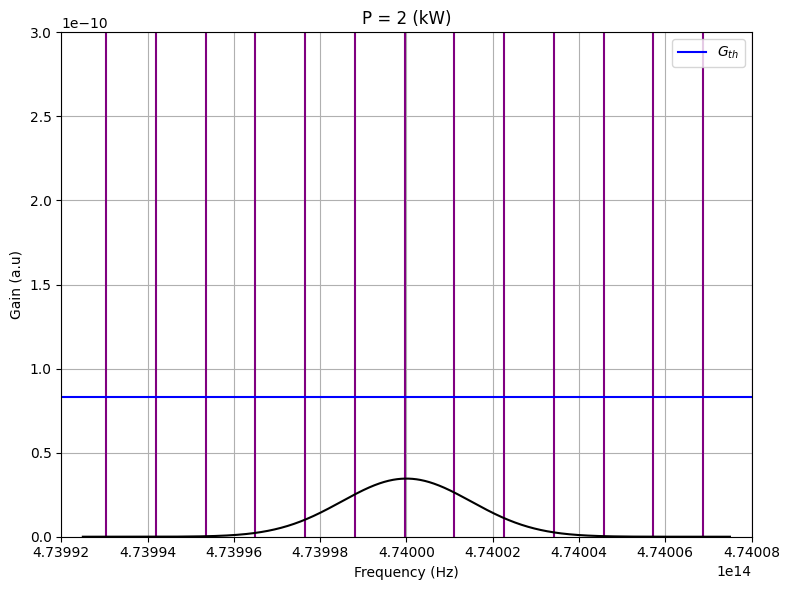

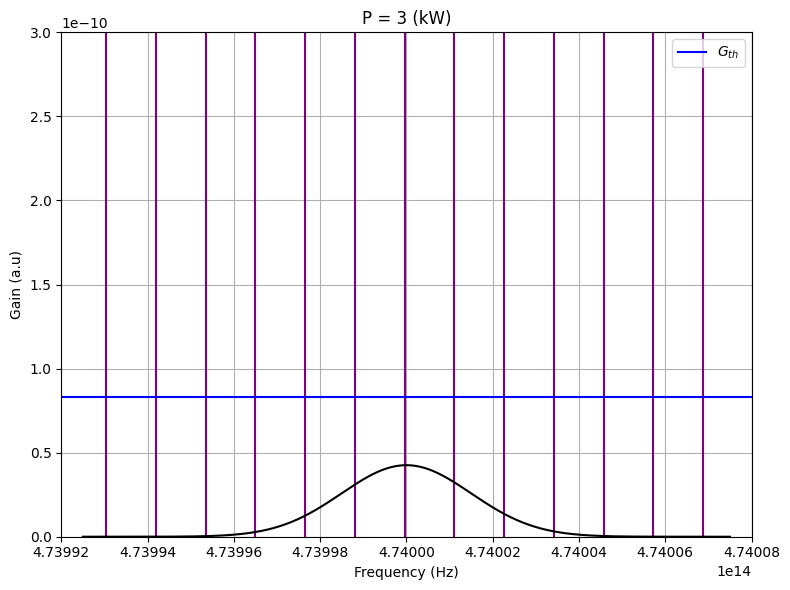

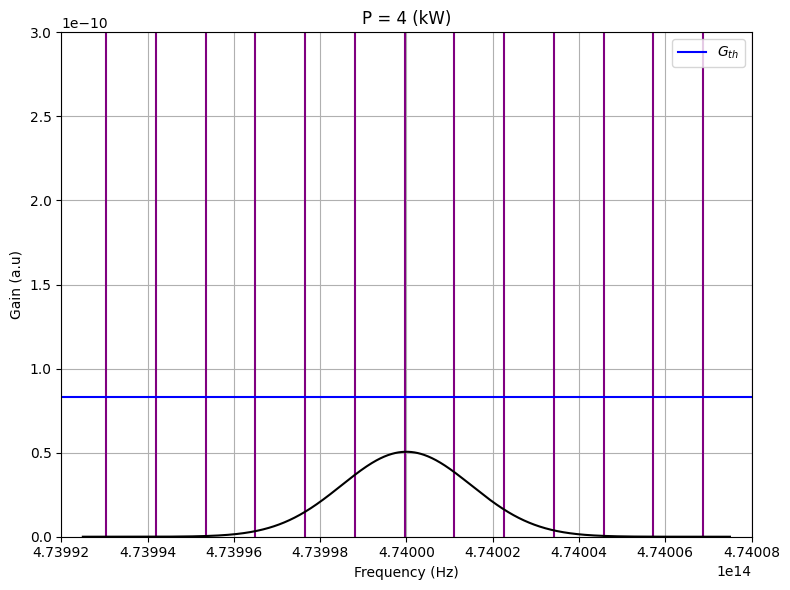

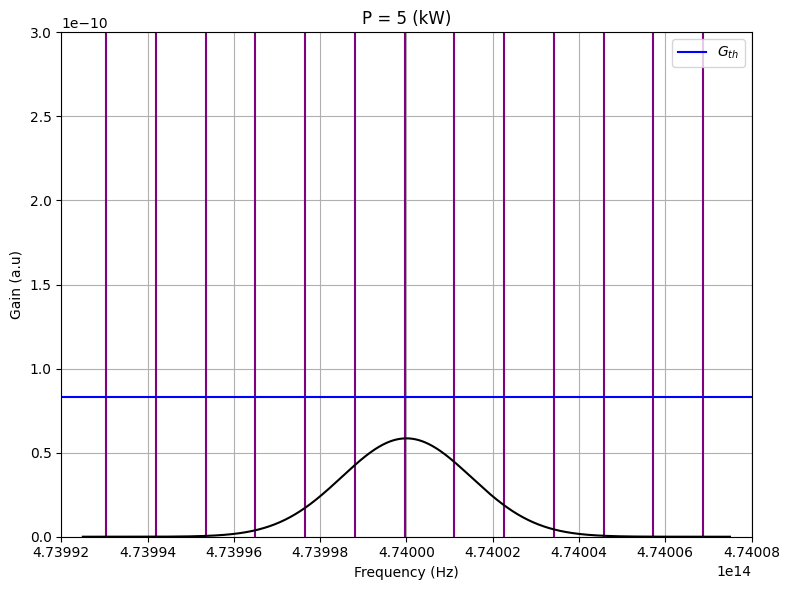

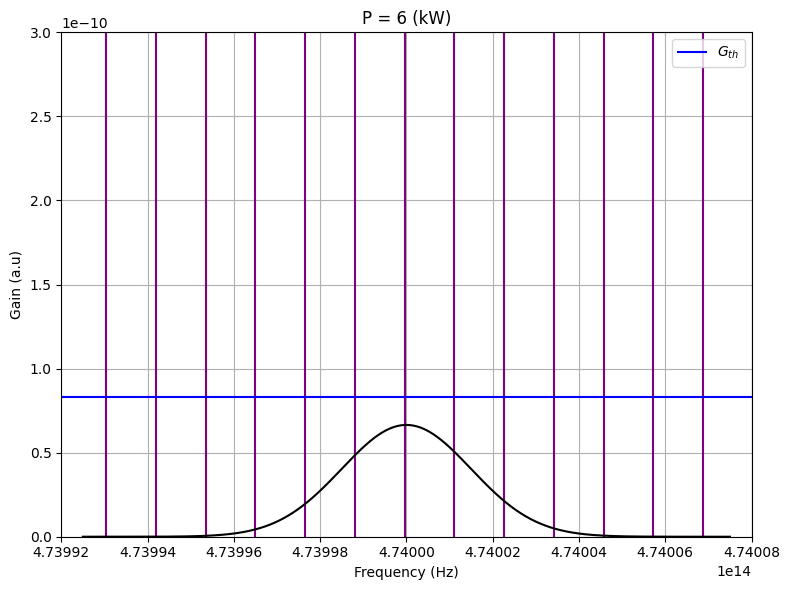

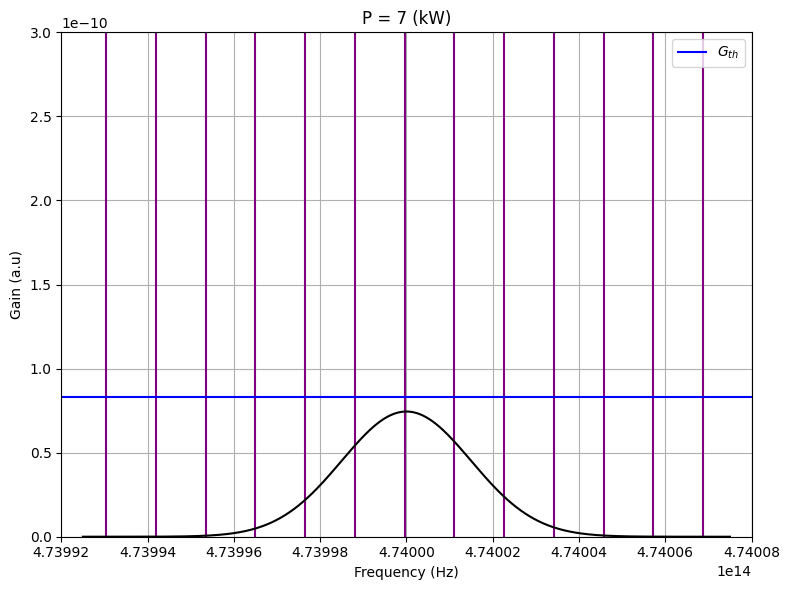

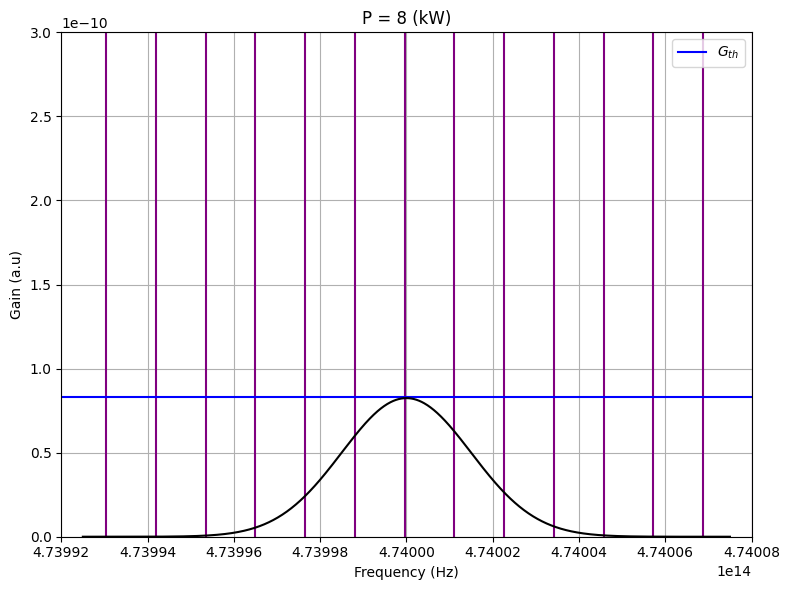

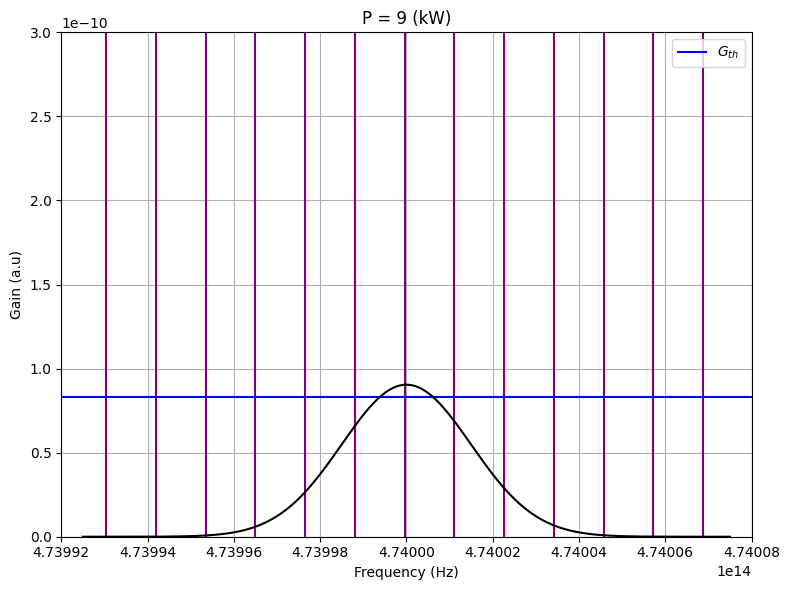

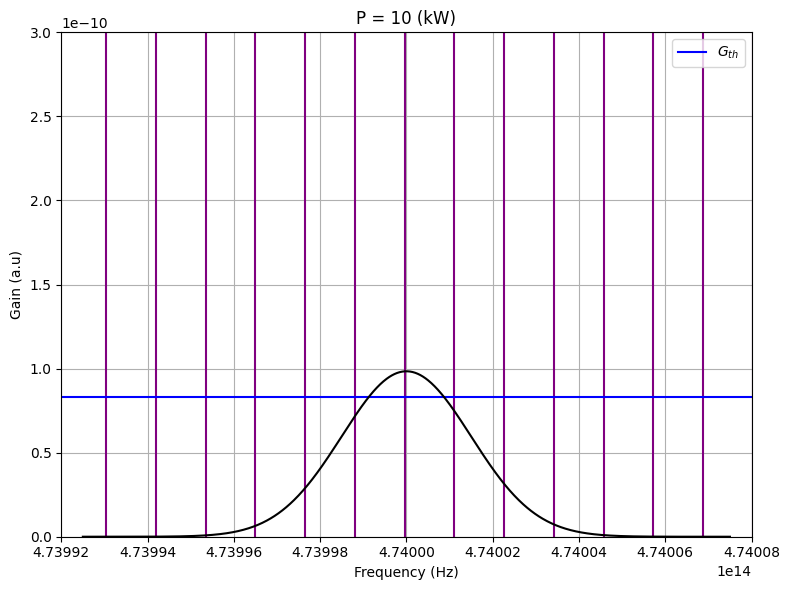

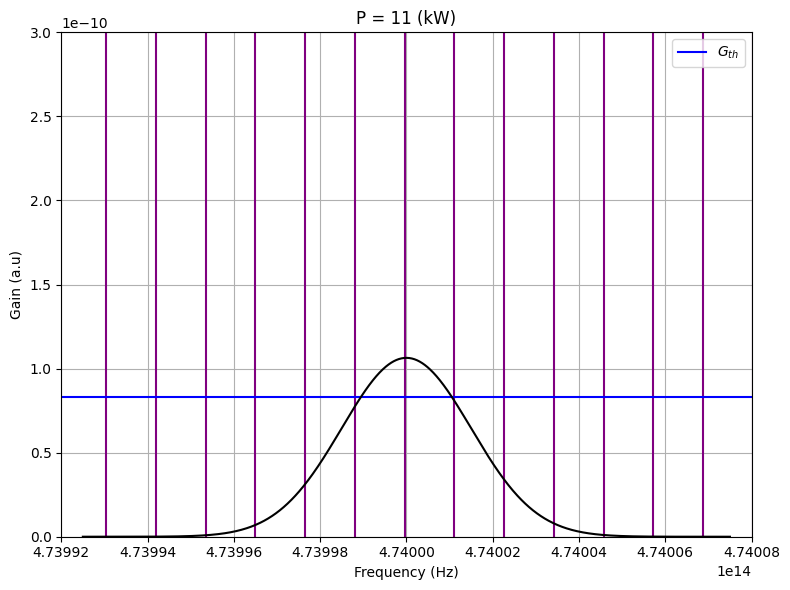

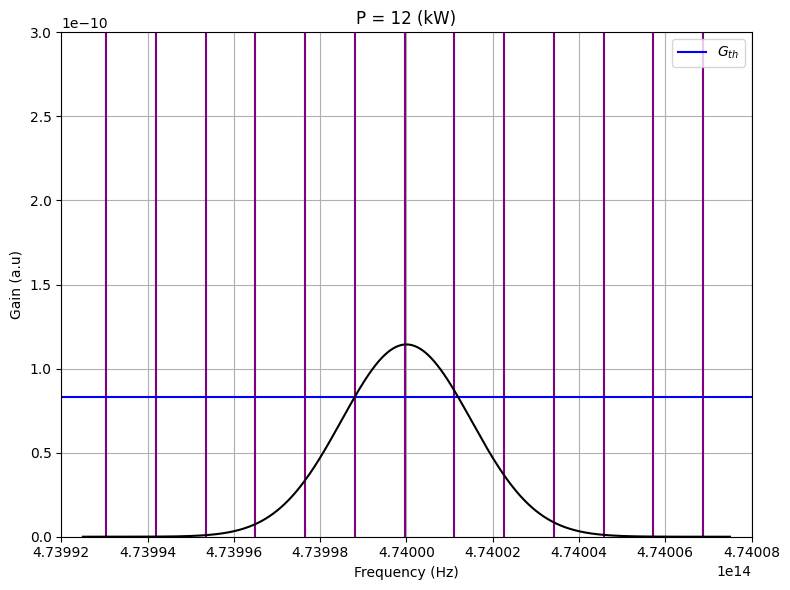

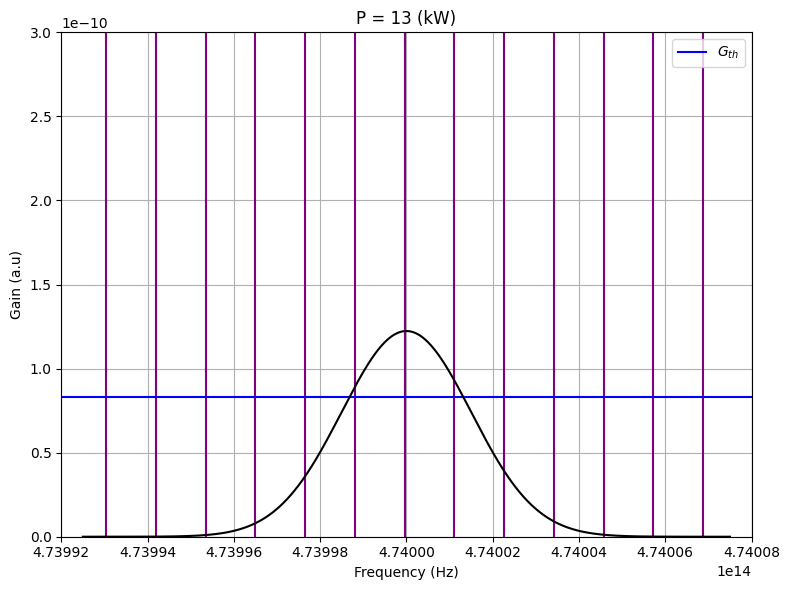

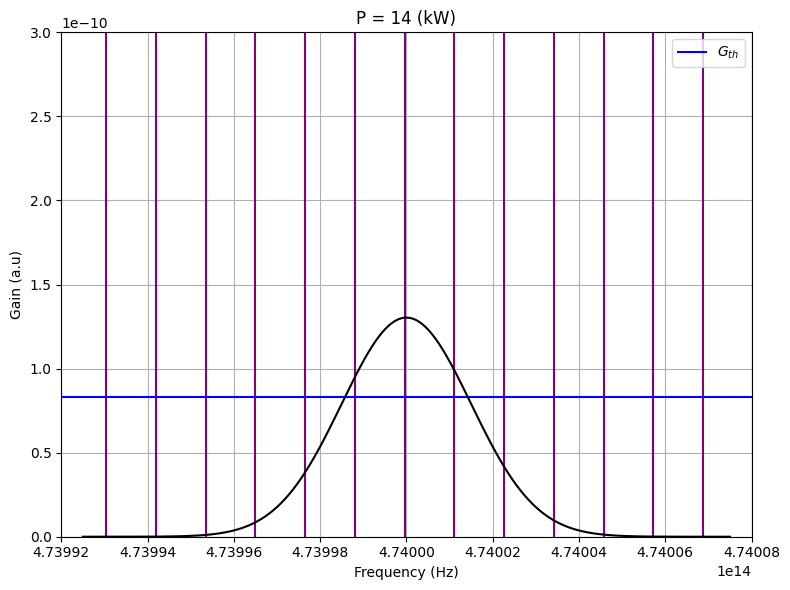

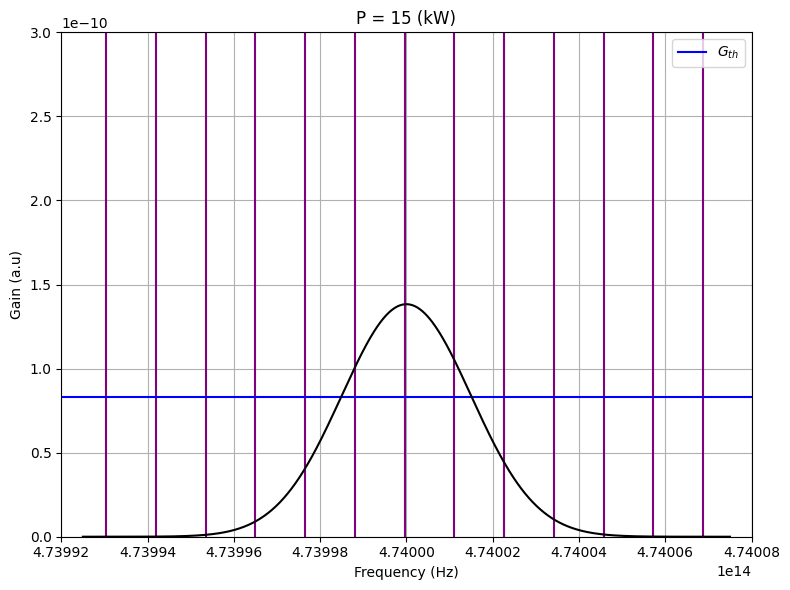

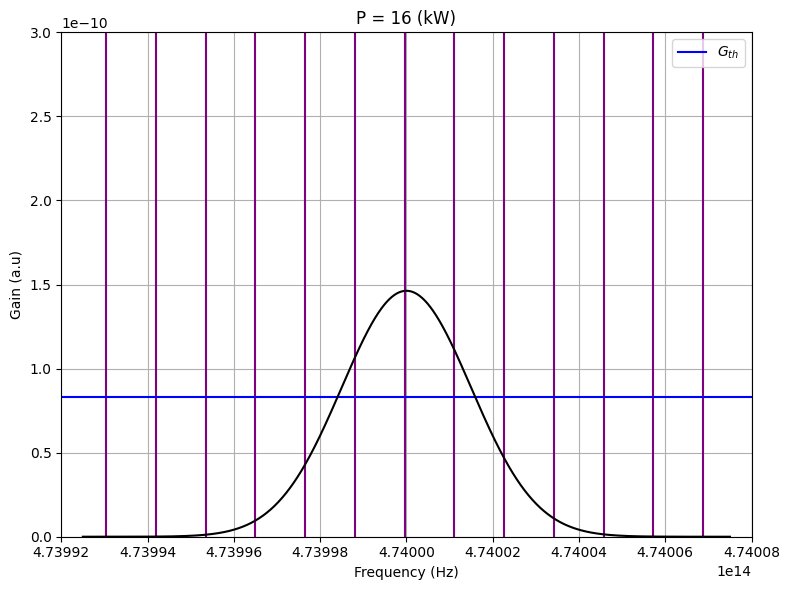

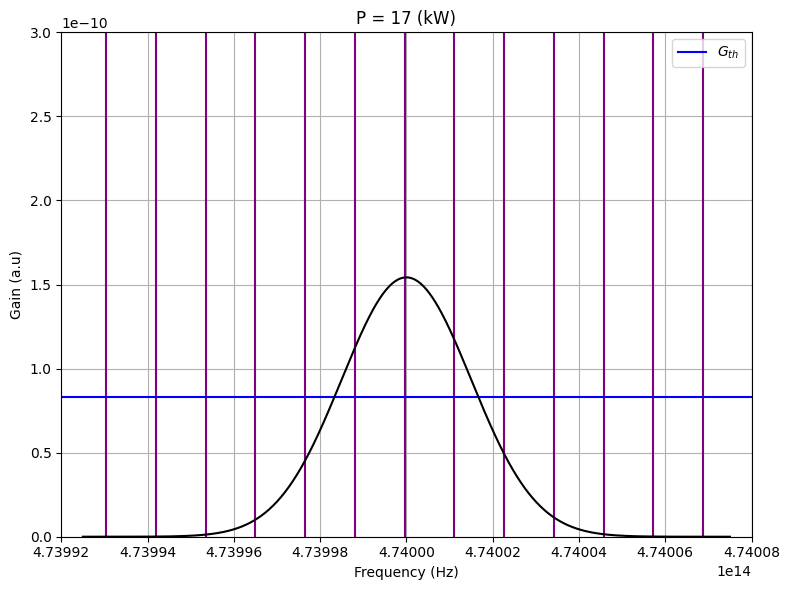

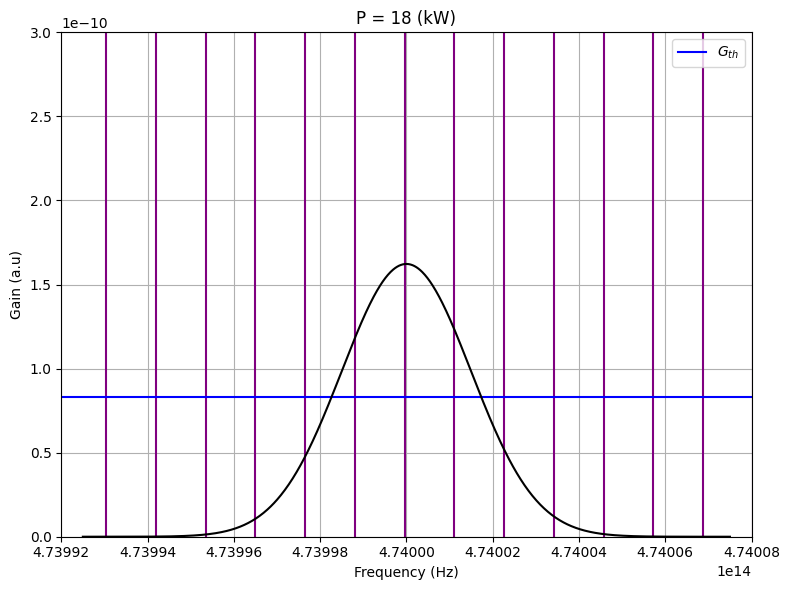

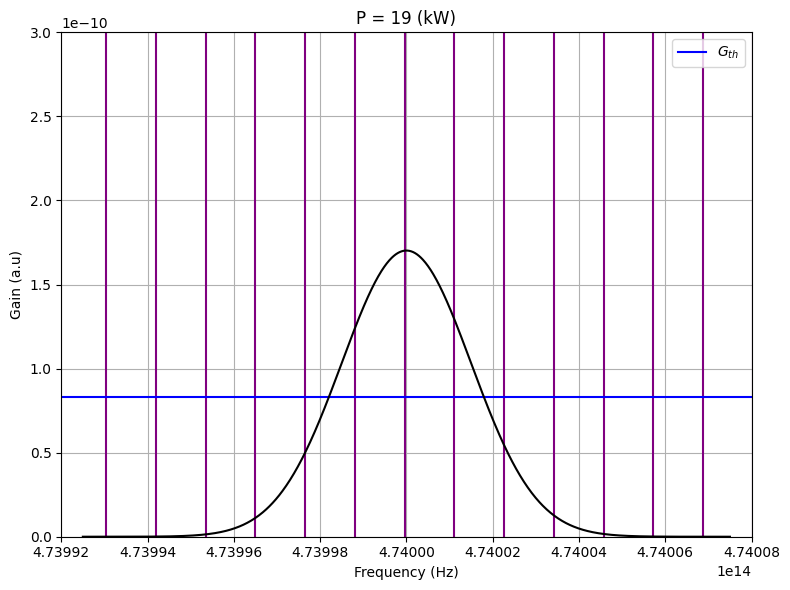

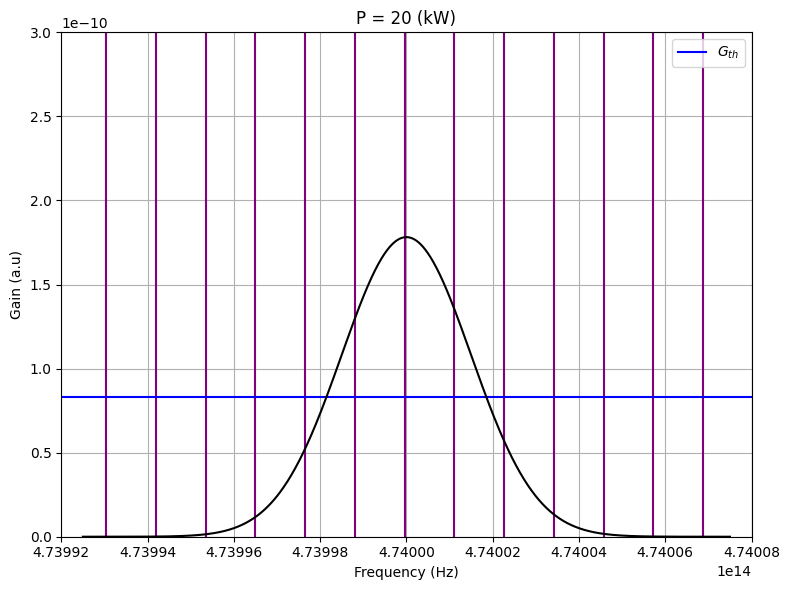

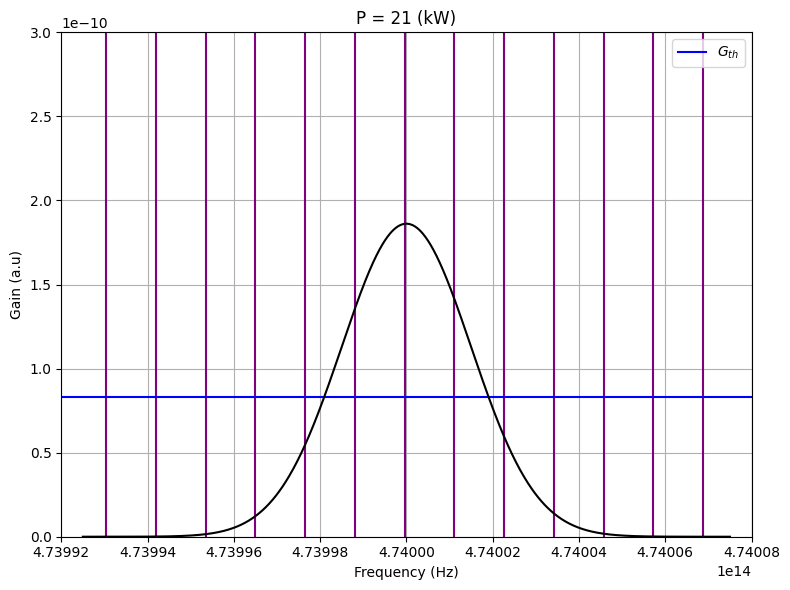

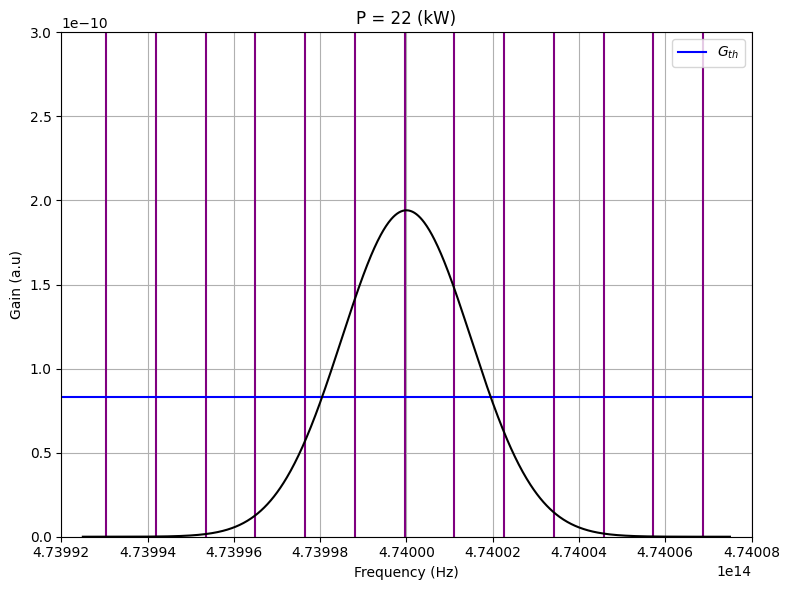

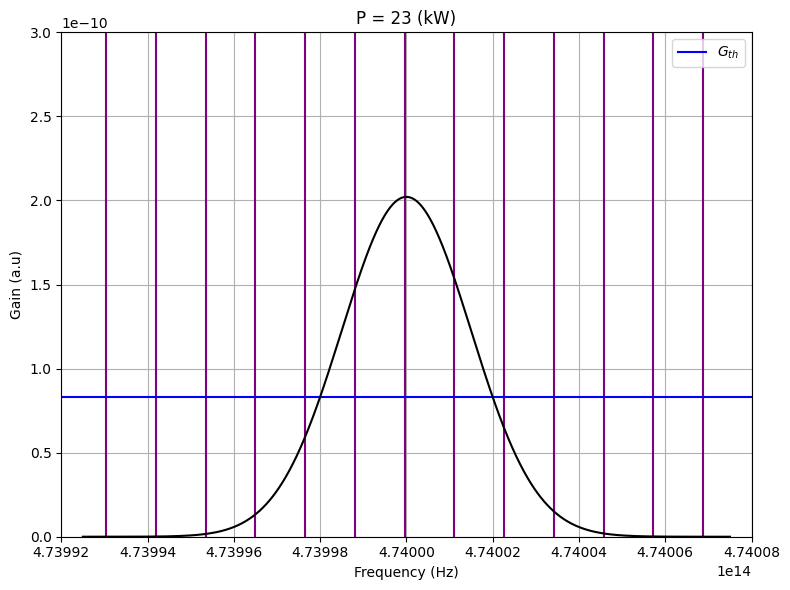

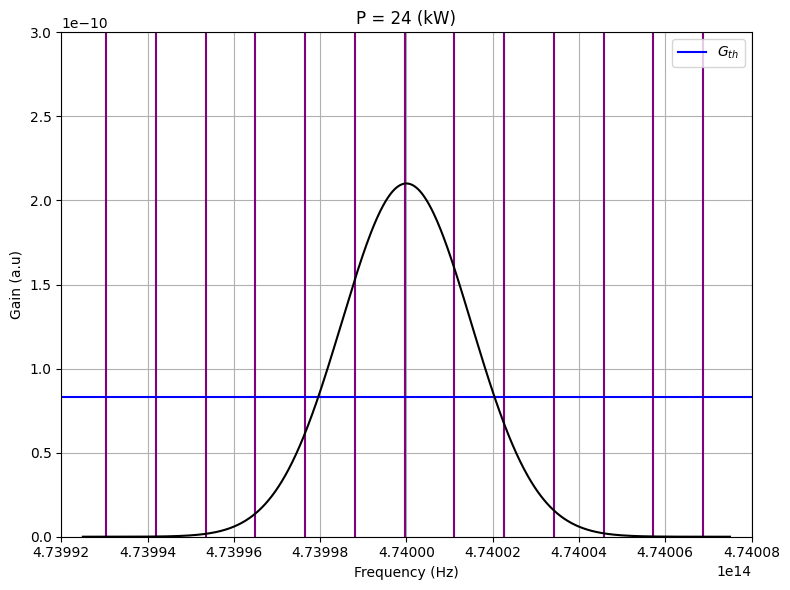

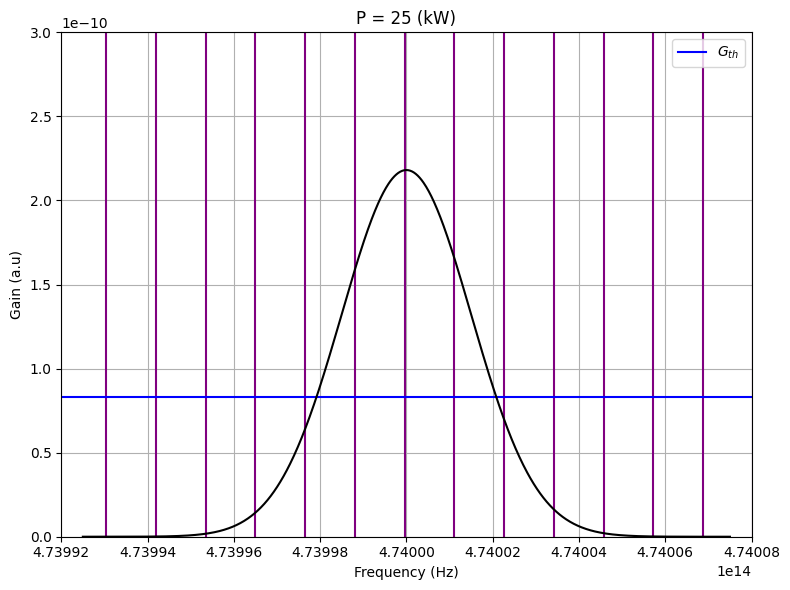

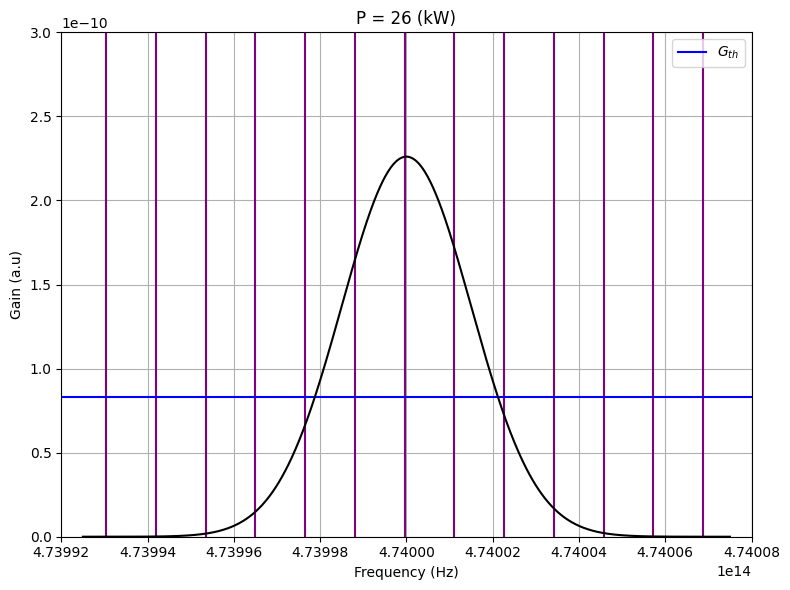

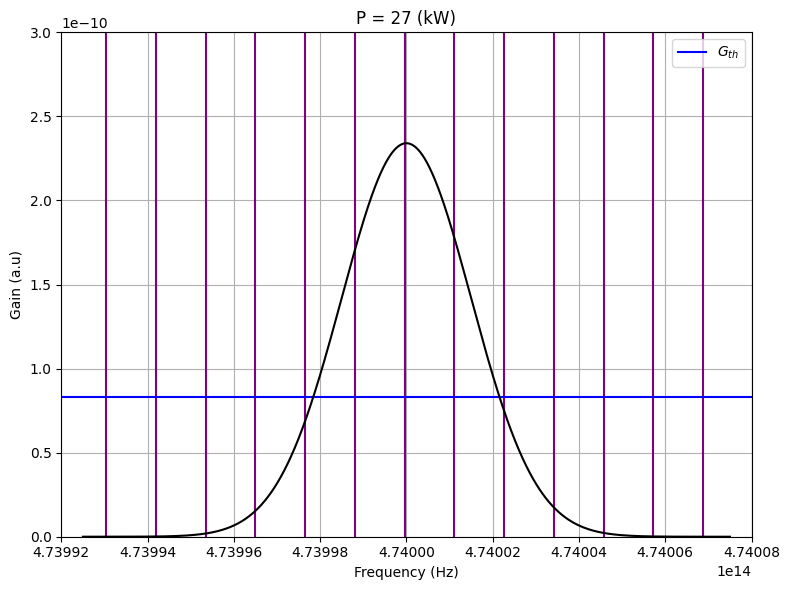

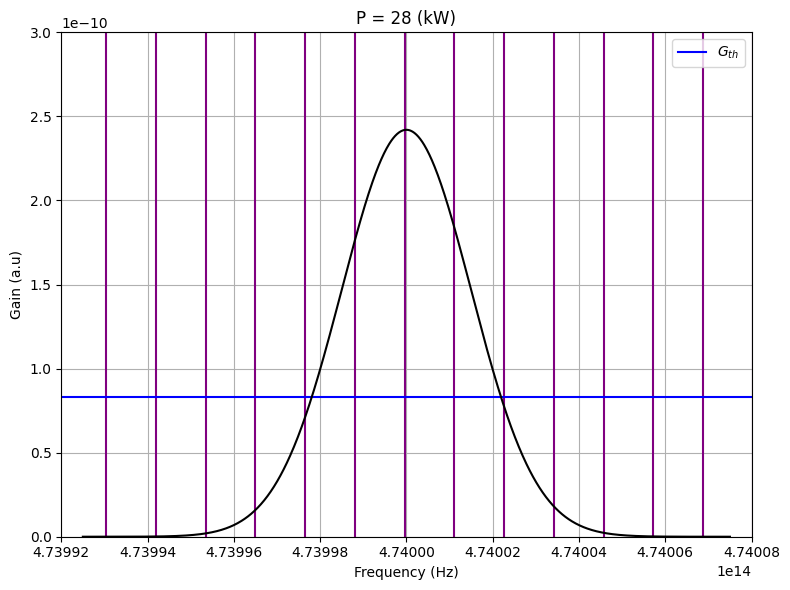

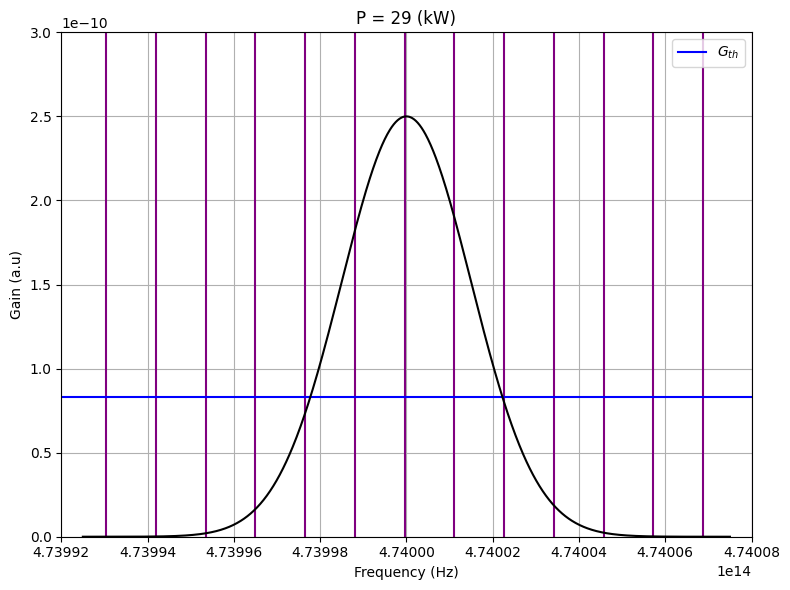

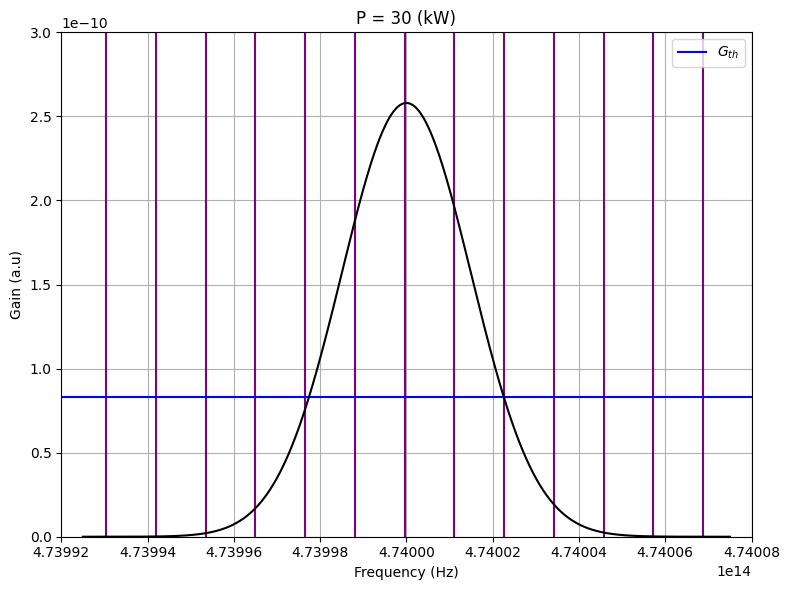

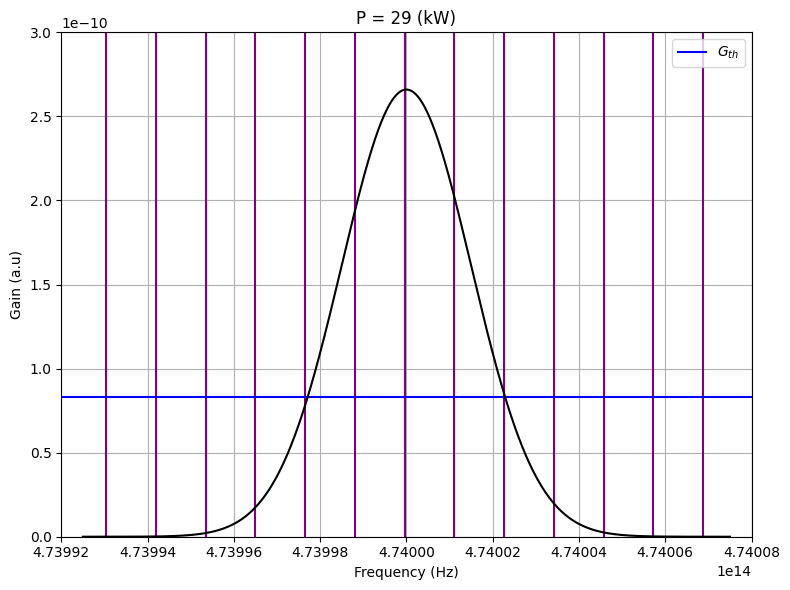

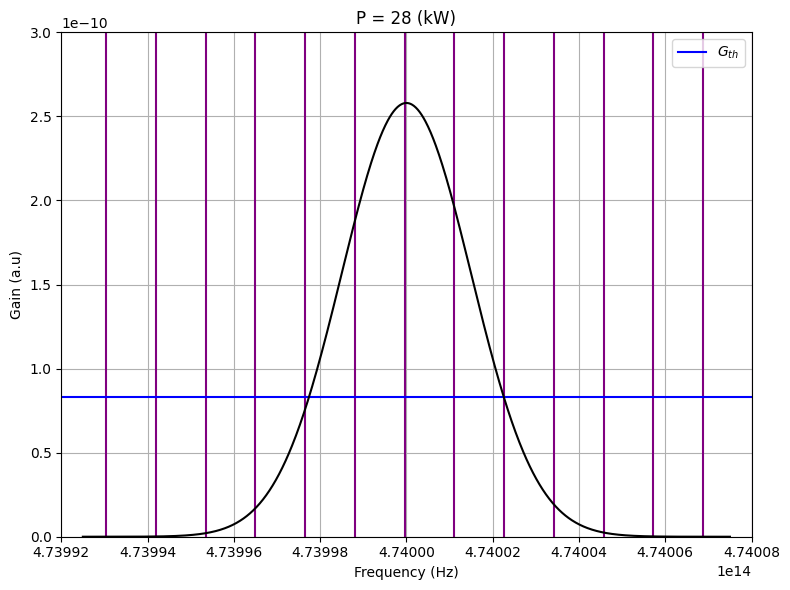

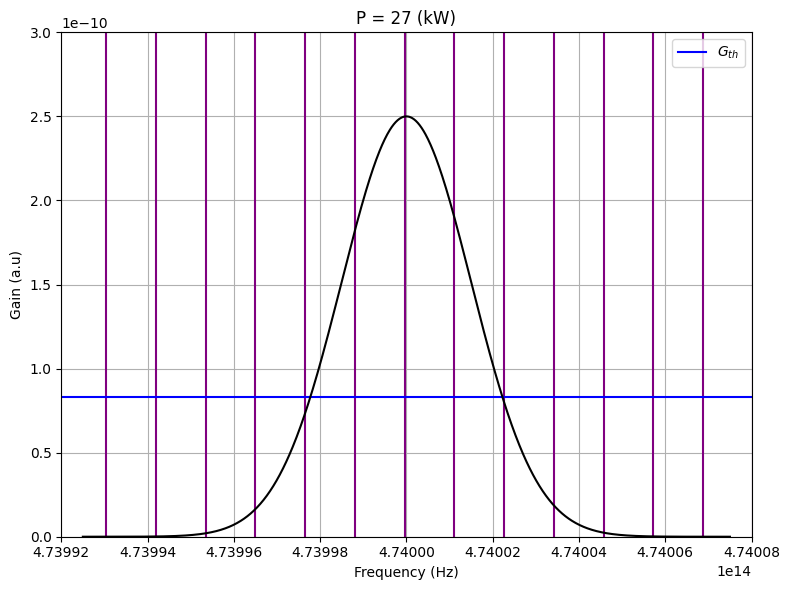

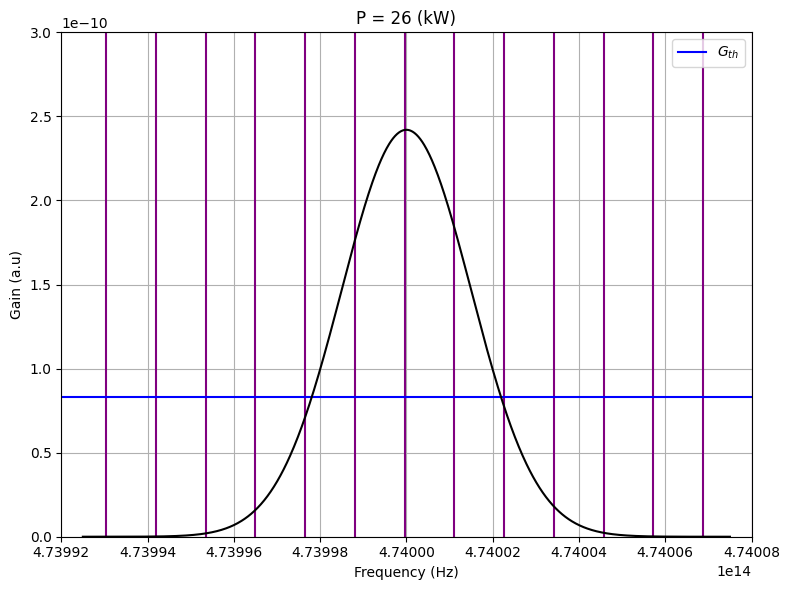

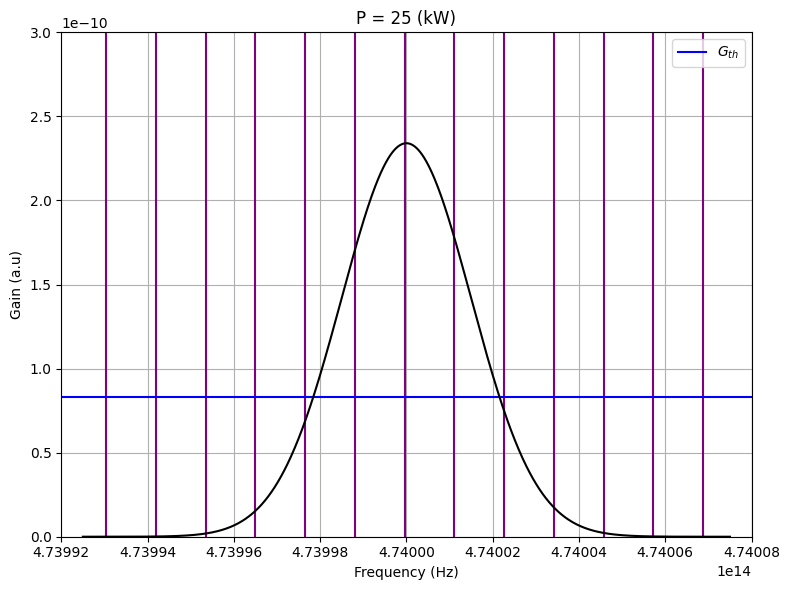

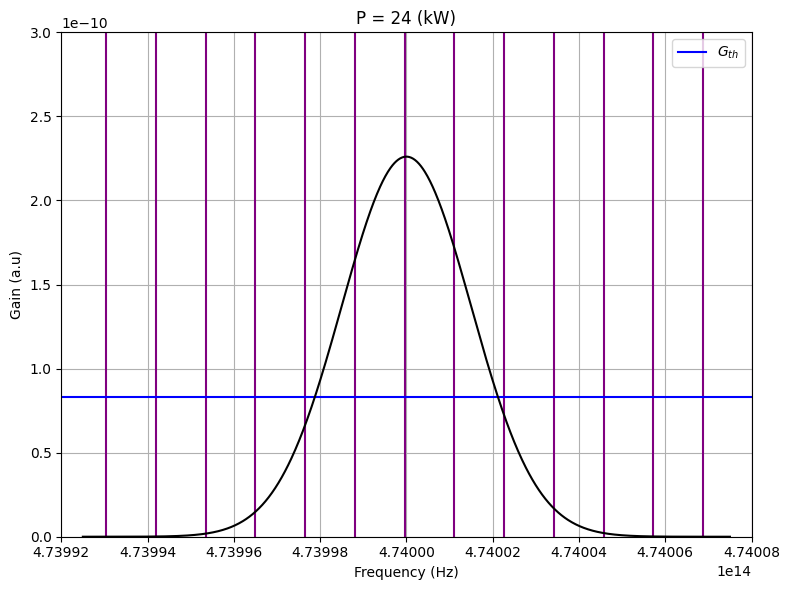

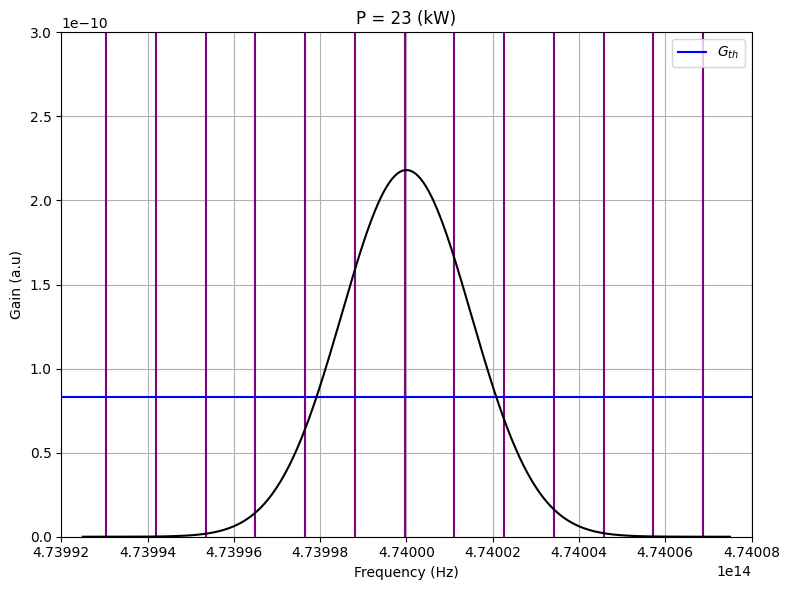

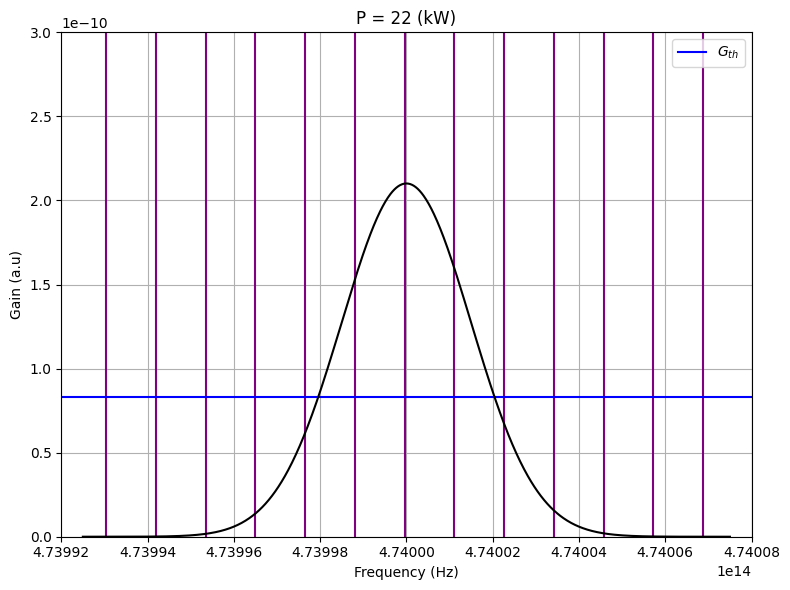

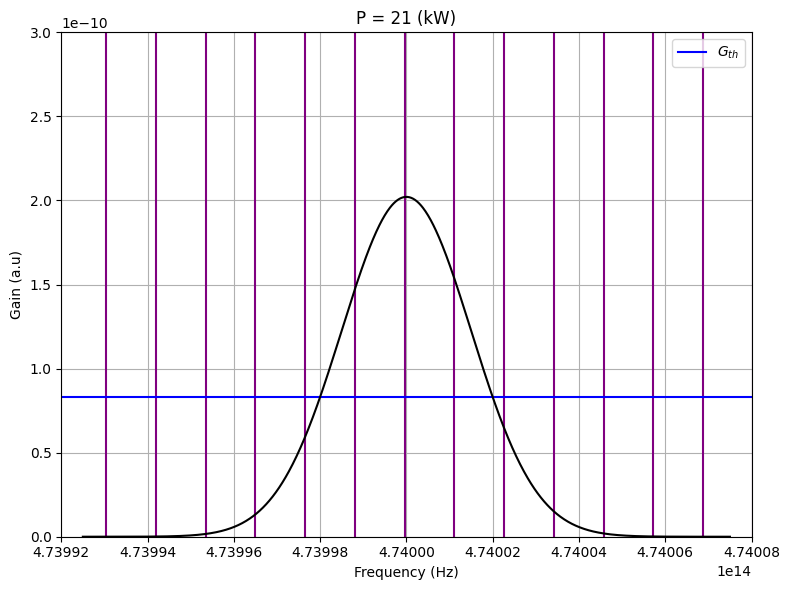

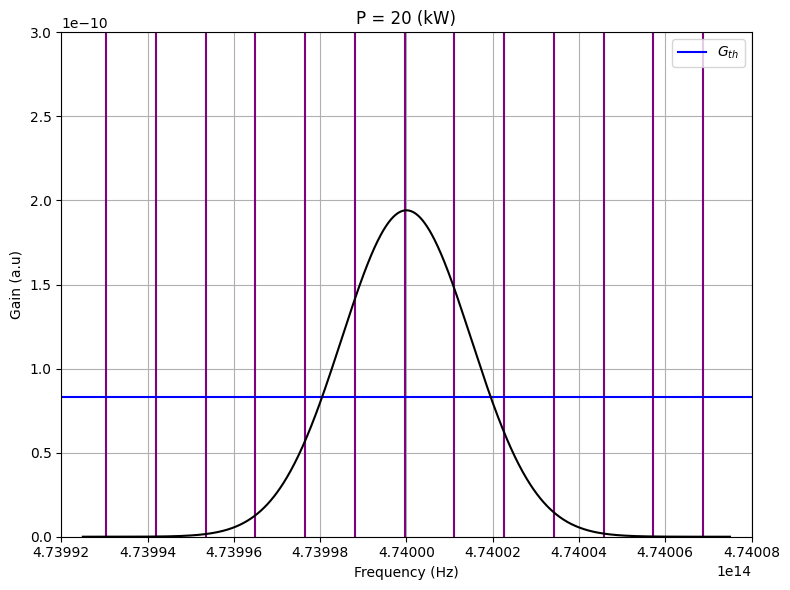

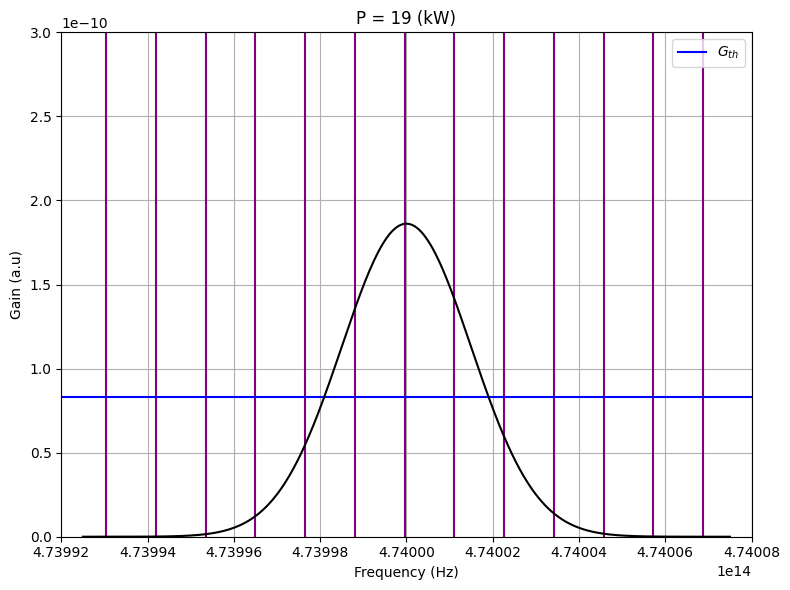

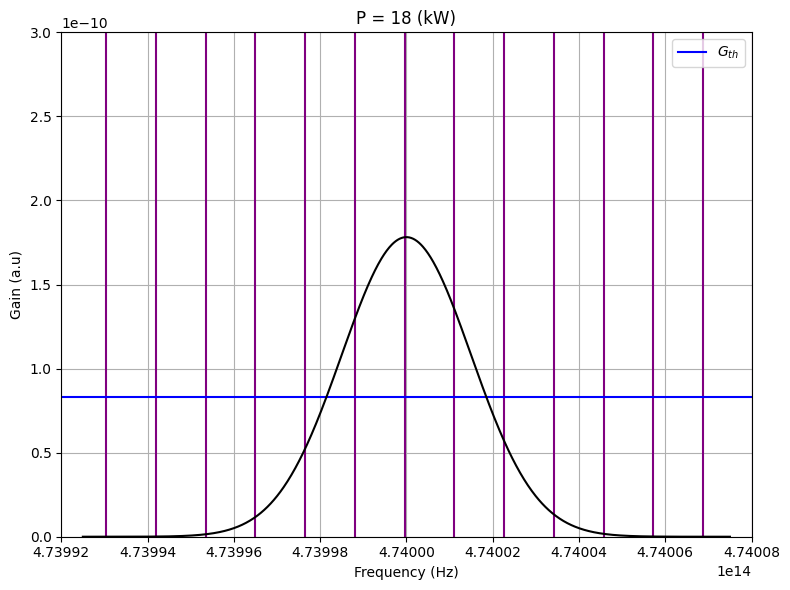

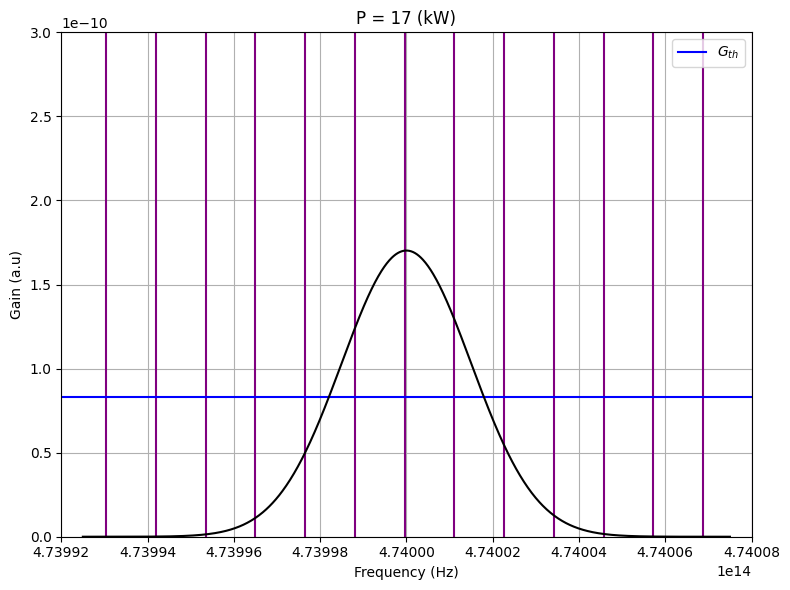

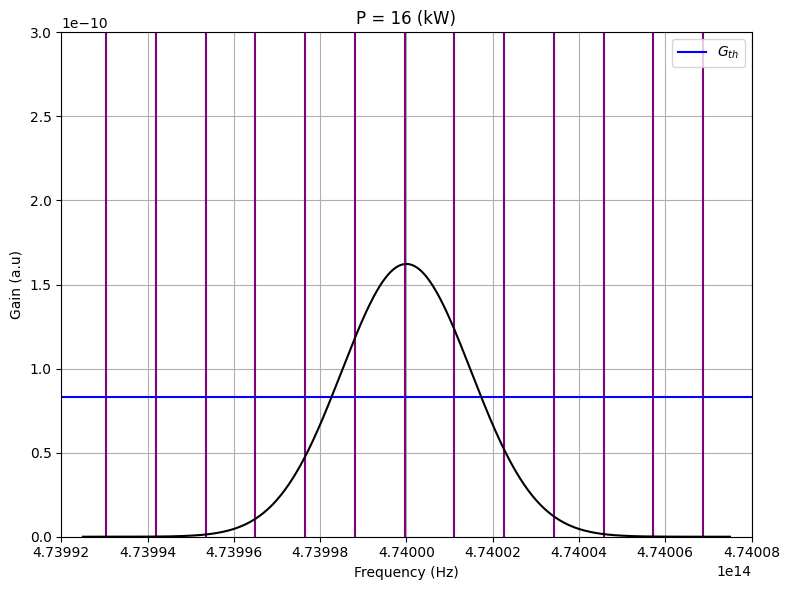

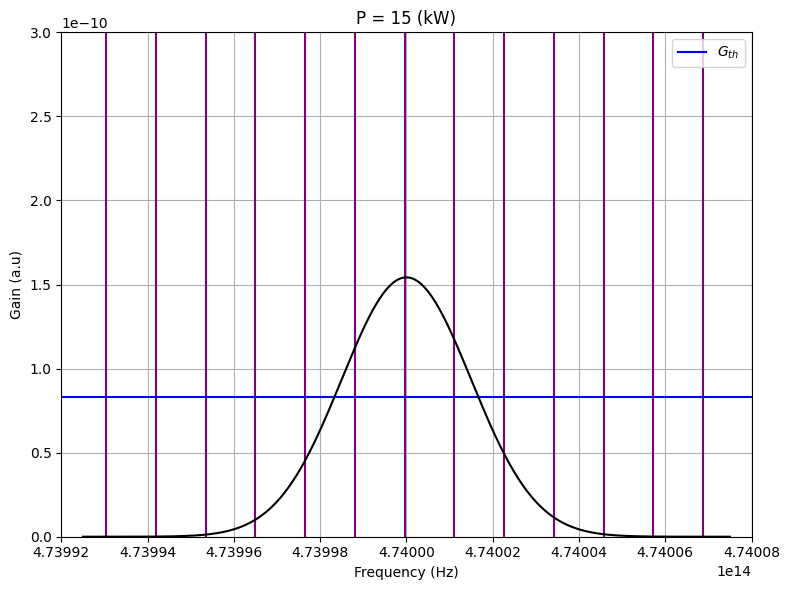

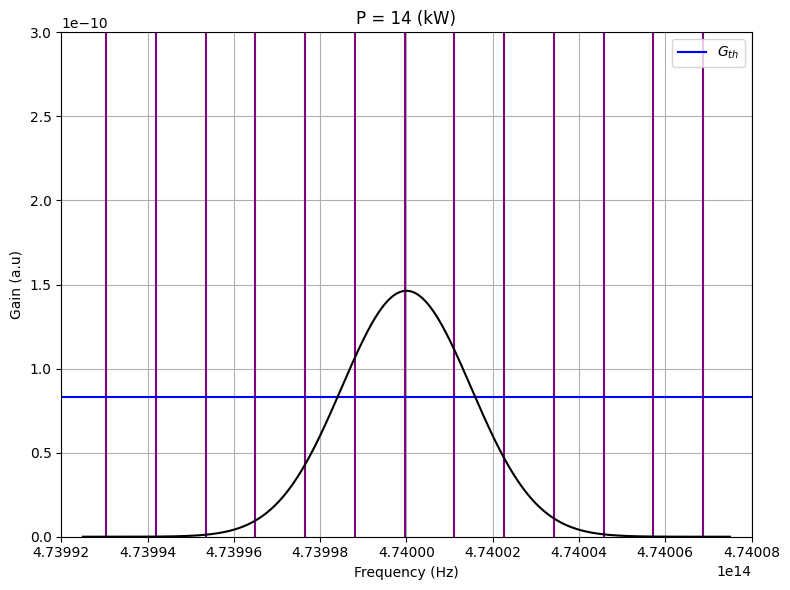

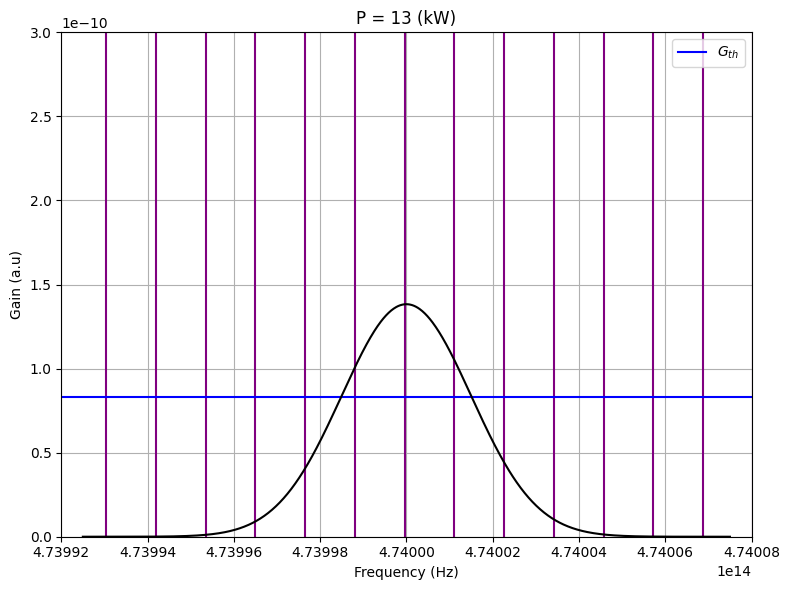

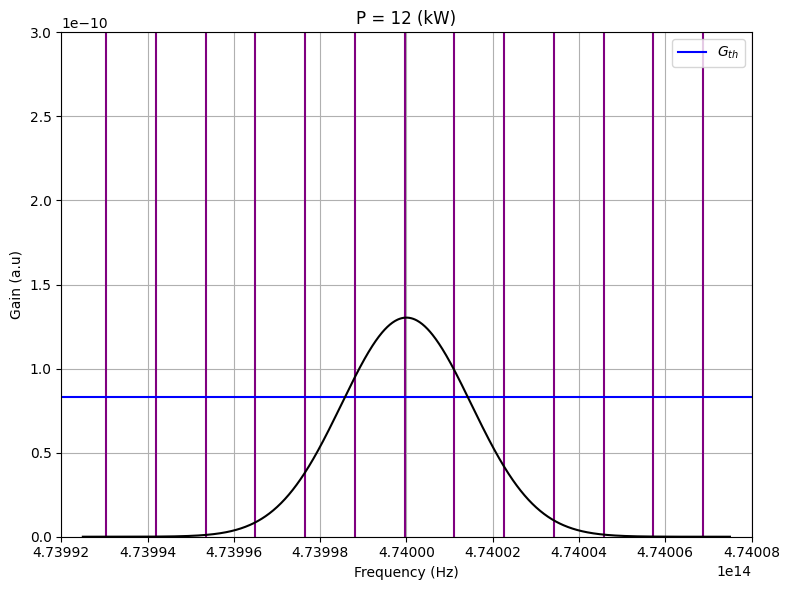

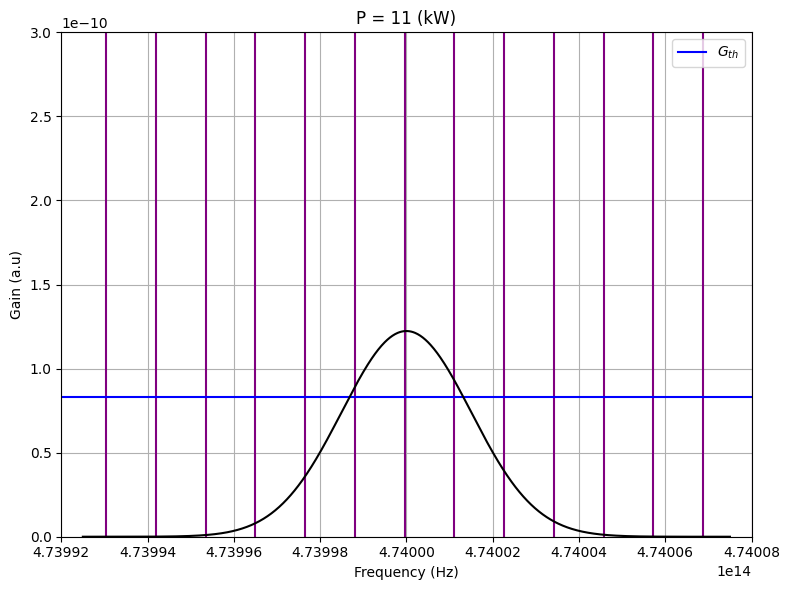

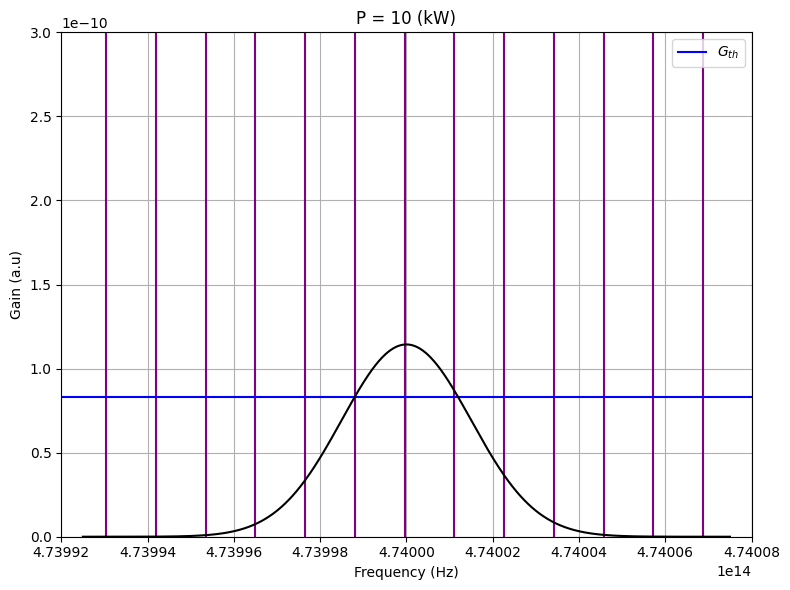

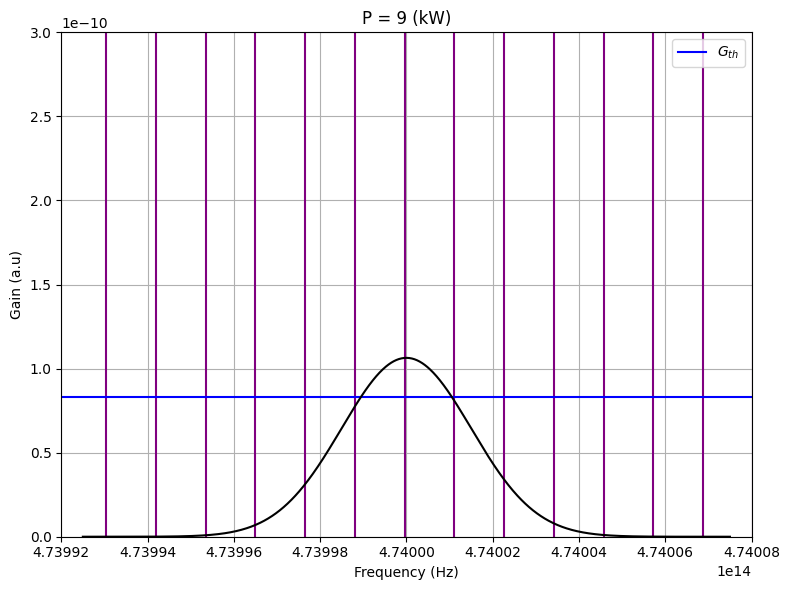

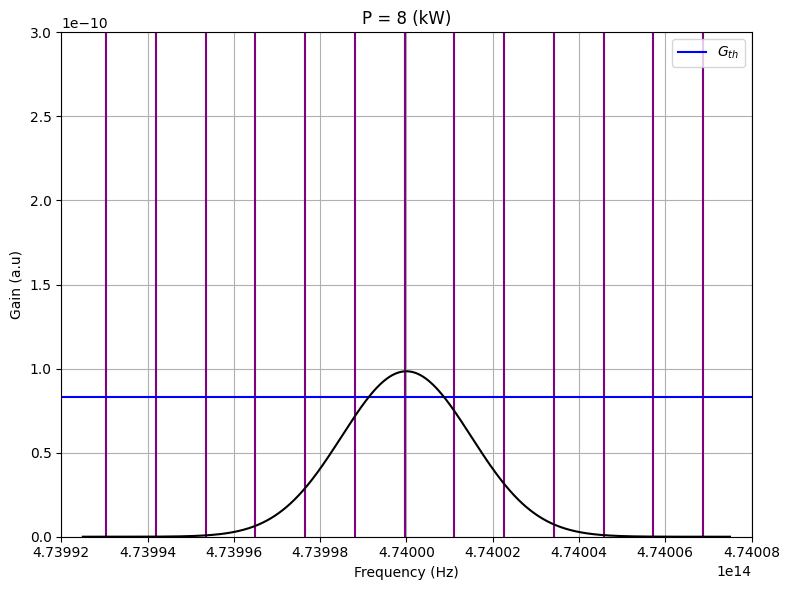

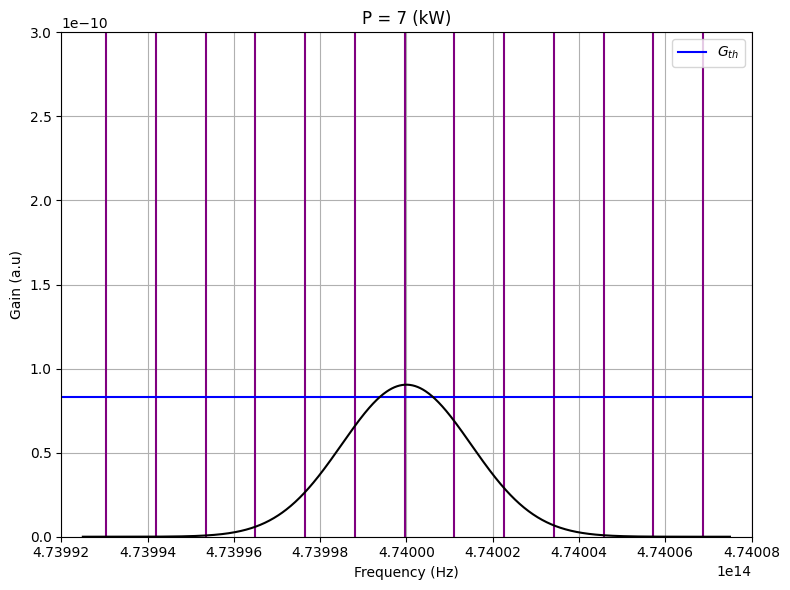

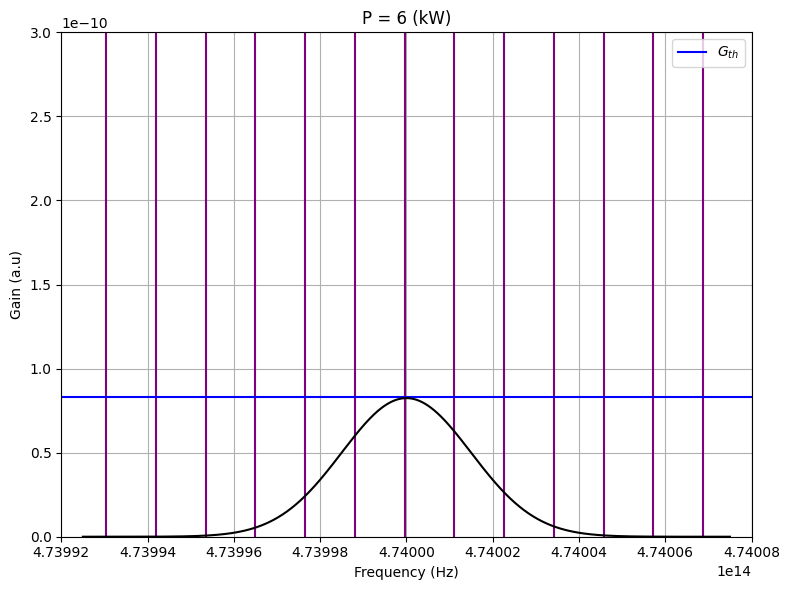

In [19]:
# Constants
l = 0.14
n = 1
c = 3 * 10**8
sigma = 1.5 * 10**9
mu = 4.74 * 10**14 
count = 0 
pump = 0.1

while pump <= 1 :
    count += 1
    
    # Eigenfrequencies
    max = np.floor(((mu - 5*sigma)*2*l)/c)
    min = np.floor(((mu + 5 * sigma)*2*l)/c)
    diff = np.abs(int(max - min))
    m = np.linspace(max, min, diff)  # Mode indices
    nu = (c * m) / (2 * l * n)  # Eigenfrequencies
    fsr = c/(2*l)
    
    # Lineshape function
    x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)
    f = pump*(1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2)) # Gaussian
    #f = (1/np.pi)*((sigma/2)/((x - mu)**2 + (sigma/2)**2)) # Lorentzian
    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Plot eigenfrequency lines
    for i in range(len(nu)):
        plt.axvline(x=(nu[i] + fsr/2), color='purple', linestyle='-')
    
    # Plot Gaussian
    plt.axhline(y=0.83e-10, color='blue', linestyle='-', label = '$G_{th}$')
    plt.legend()
    plt.plot(x, f, color='black')
    plt.title(f'P = {count} (kW)')
    plt.xlim(4.73992e14,4.74008e14)
    plt.ylim(0, 3.0e-10)
    
    # Formatting
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Gain (a.u)")
    
    plt.ticklabel_format(useOffset=False)  # Show absolute x-axis values
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'pump/img{count}.png')
    pump += 0.03
set = count
# Saturation process:
while count > 6 :
    set += 1
    count -= 1
    #sigma = sigma - 0.05*10**9
    
    # Eigenfrequencies
    max = np.floor(((mu - 5*sigma)*2*l)/c)
    min = np.floor(((mu + 5 * sigma)*2*l)/c)
    diff = np.abs(int(max - min))
    m = np.linspace(max, min, diff)  # Mode indices
    nu = (c * m) / (2 * l * n)  # Eigenfrequencies
    fsr = c/(2*l)
    
    # Lineshape function
    x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)
    f = pump*(1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2)) # Gaussian
    #f = (1/np.pi)*((sigma/2)/((x - mu)**2 + (sigma/2)**2)) # Lorentzian
    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Plot eigenfrequency lines
    for i in range(len(nu)):
        plt.axvline(x=(nu[i] + fsr/2), color='purple', linestyle='-')
    
    # Plot Gaussian
    plt.axhline(y=0.83e-10, color='blue', linestyle='-', label = '$G_{th}$')
    plt.legend()
    plt.plot(x, f, color='black')
    plt.title(f'P = {count} (kW)')
    plt.xlim(4.73992e14,4.74008e14)
    plt.ylim(0, 3.0e-10)
    
    # Formatting
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Gain (a.u)")
    
    plt.ticklabel_format(useOffset=False)  # Show absolute x-axis values
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'pump/img{set}.png')
    pump -= 0.03

plt.show()